# Week 2 Ingesting and Exploring the Dataset

In [1]:
# install wordcloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# change working directory
import os
os.getcwd()  # Get current working directory
os.chdir('..')  # Move up one directory level from notebooks
print(os.getcwd())
#os.chdir('../data') # change to the data folder

/home/jupyter-geean/cookiecutter-data-science/{{ cookiecutter.repo_name }}


In [4]:
# load the data
df = pd.read_csv('data/Combined Data.csv', index_col=0)


In [5]:
# make a copy and get rid of the missing values
df1 = df.copy()
df1.dropna(inplace = True)
# see the top head of the data
df1.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [6]:
# number of missing values
missing_values = df.isnull().sum()

print(missing_values)

statement    362
status         0
dtype: int64


In [7]:
# get the rows and columns of all of the data
rows,columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 53043
Number of columns: 2


In [8]:
# calculate the number of missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

      statement   status
293         NaN  Anxiety
572         NaN  Anxiety
595         NaN  Anxiety
1539        NaN   Normal
2448        NaN   Normal
...         ...      ...
52838       NaN  Anxiety
52870       NaN  Anxiety
52936       NaN  Anxiety
53010       NaN  Anxiety
53031       NaN  Anxiety

[362 rows x 2 columns]


The dataset contains 362 missing values in the 'Statement' column and no missing values for 'Status'.


# Missing Values -Week 3

Many of the rows have NaNs and represent anxiety and normal. Since there are 53,043 values and there are only 362 rows where there is missing values. We feel that it is best to drop these rows since they represent only 0.7% of the data and as you will see later we have an abundance of "normal" and "anxiety" labeled data.

The dataset includes 52,681 rows and 2 columns after removing missing values.

In [9]:
# get the rows and columns of the data that drops the missing values
rows,columns = df1.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 52681
Number of columns: 2


 We want to add a column to explore the length of each statement. This can help us quantify the user's input and support further analysis. This will give us an idea on how to preprocess the text and determine tokenization especially for transformer models. Many NLP models, especially those based on deep learning, have limitations on input length so determining the length is important.

In [10]:
# create a new column that gives the length of each statement
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))
df1.head()

statement   status  statement_len
0                                         oh my gosh  Anxiety              3
1  trouble sleeping, confused mind, restless hear...  Anxiety             10
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14
3  I've shifted my focus to something else but I'...  Anxiety             11
4  I'm restless and restless, it's been a month n...  Anxiety             14

From the output, we can see that this dataset includes 2 variables: statement and status.

The statement variable is a text variable that contains different user inputs.

The status variable represents different emotional statuses, which contain different categories.

The next step is to explore dataset

In [11]:
# information about the dataset
'''The class type of the DataFrame.
The range of the index.
The number of columns and their names.
The count of non-null values in each column.
The data type of each column.
The memory usage of the DataFrame.'''

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
None


Statement and status column are object data types. The statement_len column is an integer/numeric datatype.

In [12]:
# descriptive statistics
'''count is the number of non-null entries.
unique is the number of unique values.
top is the most frequent value.
freq is the frequency of the most frequent value.'''
df1.describe(include='object').T

count unique                top   freq
statement  52681  51073  what do you mean?     22
status     52681      7             Normal  16343

The 'Statement' column contains 51,073 unique values, indicating that most user inputs are unique. The most frequently appeared statement is "What do you mean?" and occurred 22 times in the dataset. The frequent occurrence of "What do you mean?" suggests significant communication gaps or misunderstandings, indicating areas where individuals feel confused or need more clarity, which is crucial in mental health discussions. This phrase often reflects a state of uncertainty or anxiety, signaling important emotional states. It could also indicate active engagement and a desire for better understanding and it could indicate that individuals need more support or reassurance, aiding in tailoring mental health resources effectively.

The 'Status' column contains 7 unique values and represents different emotion statuses. The most common status is "Normal", suggesting that over 30% of the statements in the dataset fall under this category.

In [13]:
# Get summary statistics for the 'statement_len' column
summary_statistics = df1['statement_len'].describe()
print(summary_statistics)

count    52681.000000
mean       113.035914
std        163.501877
min          1.000000
25%         15.000000
50%         62.000000
75%        148.000000
max       6300.000000
Name: statement_len, dtype: float64


In [14]:
# Calculate the mode of the 'statement_len' column
mode_value = df1['statement_len'].mode()[0]

print(f"The mode of the 'statement_len' column is: {mode_value}")

The mode of the 'statement_len' column is: 5


The summary statistics for the 'Statement_len' column show the distribution of statment lengths. The average statement contains 113 words with a standard deviation of 163.5 words. The shortest statement only has 1 word, while the longest contains 6300 words. The most frequent statement length is 5 words, indicating that short phrases are commonly used.

The following bar plot of the frequency of statement length visualizes the previous statement.

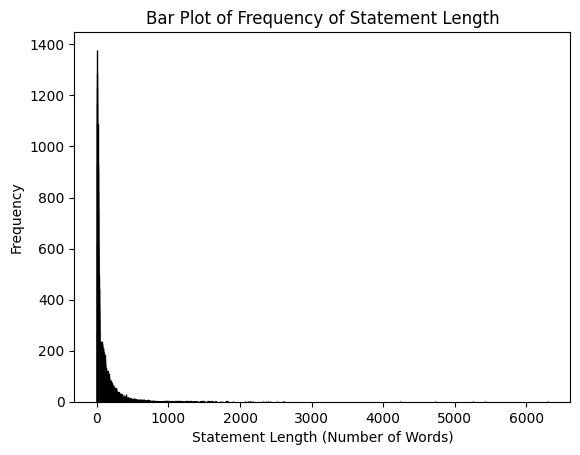

In [15]:
# Create a bar plot of the frequency of the 'statement_len' column
statement_len_counts = df1['statement_len'].value_counts()

plt.bar(statement_len_counts.index, statement_len_counts.values, edgecolor='black')
plt.xlabel('Statement Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency of Statement Length')
plt.show()

The histogram shows that it is a right skewed distribution, which most of the statement length under 1000 words.
This means that when we focus on the output length, we should set it to be under 1000.

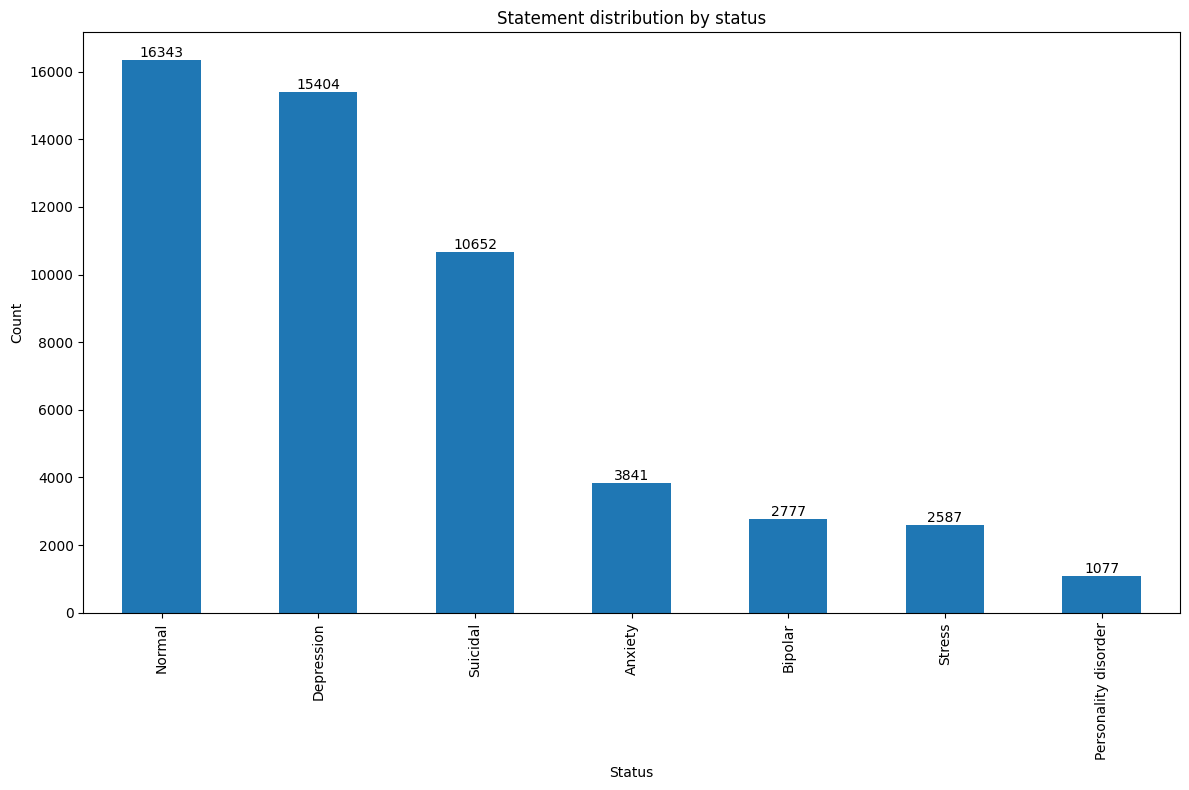

In [16]:
# Histogram of Frequency of Statements by Status
plt.figure(figsize=(12,8))

# get the unique status values and their counts
status_counts = df1['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Here is a plot showing distribution by status. Normal is the most common status and contains 16343 data, followed by depression and suicidal, which are the 2nd and 3rd largest portions of the dataset. Personality disorder is the most rare one, which contains 1077 data.

The ratio between different statuses suggests about 70% of the user's input falls under the negative status category.

The target variable in our dataset is unbalanced in favor of depression, suicidal and normal. This imbalance could affect our model's performance, so we'll need to address it later to ensure accurate and fair predictions especially when predicting sentiment analysis for anxiety, bipolar, stress and personality disorder.

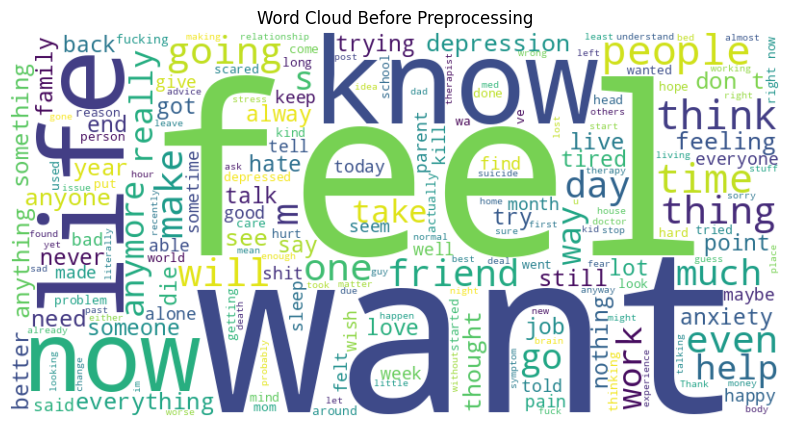

In [17]:
# Word Cloud Before Preprocessing
# Combine all statements into a single string
text = ' '.join(df1['statement'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

Here is the word cloud for Statement before data processing, which will be used to compare with the data after processing. The word cloud shows that the most frequently used words are "feel," "want," "know," and "life.". The observation is reasonable considering verbs and similar expressions that reflect personal thoughts would be the biggest part of user inputs. We can also see words like "depression," "tired," and "anxiety" in the word cloud even before data processing, which matches our observation of the status distribution above.

This means that these words may be key indicators for determining sentiment. We will explore more by dividing word clouds into status.

### Week 3 Code- EDA and Train-Test Split

We have already done some EDA in the previous code but we will expand on it here. We will also do a train-test split.

In [18]:
# Taking a look at the long messages
df1[df1['statement_len'] > 1500]

statement  \
7851   So introduction I guess.. my name is Michael a...   
8221   do not really know where to start so I am goin...   
9504   Hello everyone,I rarely post on Reddit but.......   
10743  ThrowawayIm female, 20 years old. Ever since I...   
10834  I have only 1 person I can somewhat open to bu...   
11537  The title is not meant to discourage others, b...   
11581  I no longer know what else to do but write thi...   
11636  And has life gotten better?&amp;#x200B;No. Eve...   
11831  Sorry this is long but I doubt anyone will eve...   
13188  I am frustrated. that is the constant theme wi...   
13293  I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...   
13577  I am very sick and tired, both mentally and ph...   
14602  I am 27 years old and have grown deeper into a...   
16061  Bear with me please, this may be extremely len...   
16498  Hey, this is goodbye note. it is most likely g...   
18215  I am someone living in Turkey. My age is proba...   
18323  I am going to be turning 30 in a couple weeks....   
19321  This happened a little while ago but it still ...   
19701  If there is a more beneficial sub please lmk s...   
20867  Apologies for length. there is a *lot* to expl...   
21285  First I am going to present you with a few que...   
21396  will i ever be noticed? is my life worth anyth...   
21858  I constantly repeat to myself that I have neve...   
22243  I do not expect anyone to read this rambly mes...   
22351  This is a lengthy post but its a summary of my...   
22563  I have been thinking about posting online for ...   
23195  My entire life has spontaneously combusted ove...   
23366  I wish I knew what was wrong with me. So many ...   
23820  I need support or encouragement. I (29M) reall...   
23845  This is a a vent. I (29M) really do not know w...   
24276  I guess it all started when I was I guess 11, ...   
38083  this is my first reddit post also my first tim...   
38255  i m at a very weird place in my life right now...   
38579  hello thank you for reading my post and any ad...   
39579  we ve been seeing a worrying increase in pro s...   
39582  for starter i never really had a childhood whe...   
39752  it doesn t matter anymore i m going to copy an...   
40028  this is a long story i m sorry me and my ex br...   
40208  i m at a very weird place in my life right now...   
40293  i have come to the conclusion that i am just n...   
40371  hello thank you for reading my post and any ad...   
46660  DEPRESSION HAS A PURPOSE: HOW TO USE IT RIGHT ...   
47949  Don't know what to do anymore Back when I was ...   
48915  I think I'm in the middle of a nervous breakdo...   
50253  Manic for 6 months ending up in jail where I h...   
51396  Please help me understand what I went through ...   
52775  I don't know what to do. I don't know how to d...   

                     status  statement_len  
7851             Depression           2153  
8221             Depression           1602  
9504             Depression           2139  
10743            Depression           1537  
10834              Suicidal           5248  
11537            Depression           2391  
11581            Depression           2612  
11636            Depression           2415  
11831            Depression           2187  
13188            Depression           1832  
13293              Suicidal           6300  
13577              Suicidal           1811  
14602            Depression           1809  
16061            Depression           1558  
16498              Suicidal           1566  
18215              Suicidal           2066  
18323              Suicidal           1559  
19321            Depression           1902  
19701            Depression           1661  
20867            Depression           1625  
21285            Depression           1559  
21396            Depression           2510  
21858            Depression           2599  
22243              Suicidal           2364  
22351            Depression           155

Many of the longest messages are those with depression and suicidal tendencies. This will help us since if we shorten the output length when preprocessing the data, we are not reducing the number of data points for those that do not have very many data points such as anxiety, bipolar, stress and personality disorder.

Now we want to see a clearer distribution without these outliers so that we can determine the best output length for preprocessing the text.

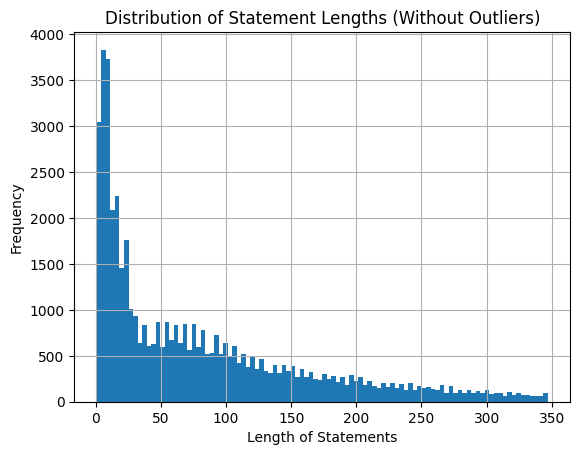

In [19]:
# Statement Length Distribution Without Outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['statement_len'].quantile(0.25)
Q3 = df1['statement_len'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df1[(df1['statement_len'] >= lower_bound) & (df1['statement_len'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statement_len'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

This distrubtion still shows a right-skewed data distribution. We now have a much clearer distribution where approximately 50% of the statements have 0-50 word lengths, especially with a spike at approximately 25 words with approximately 3700 statements. This will help us immensely to determine the best statement length to run our transformer models to save computational resources and time but not decrease model performance.

Now we want to take a closer look at the word clouds for each status since it will give us even more information about the possible word indicators for each status.  

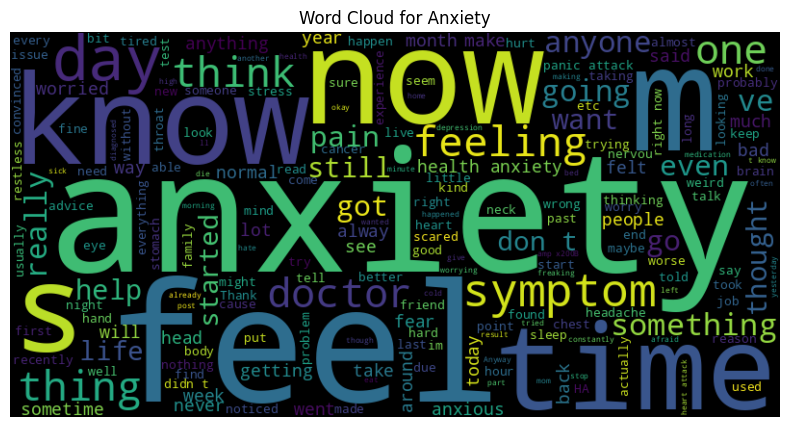

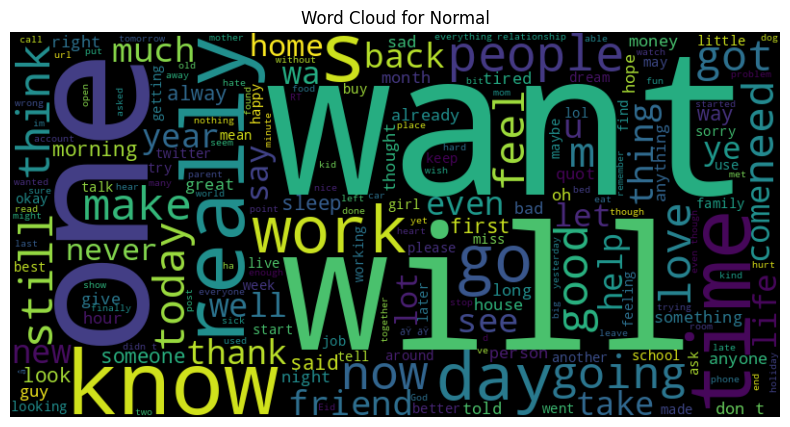

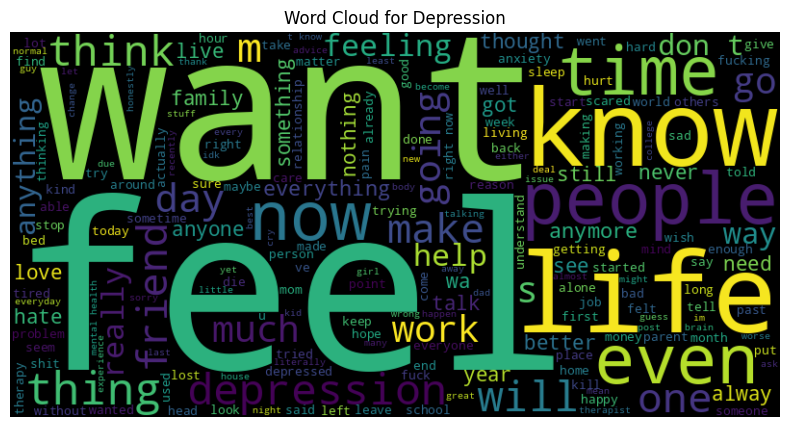

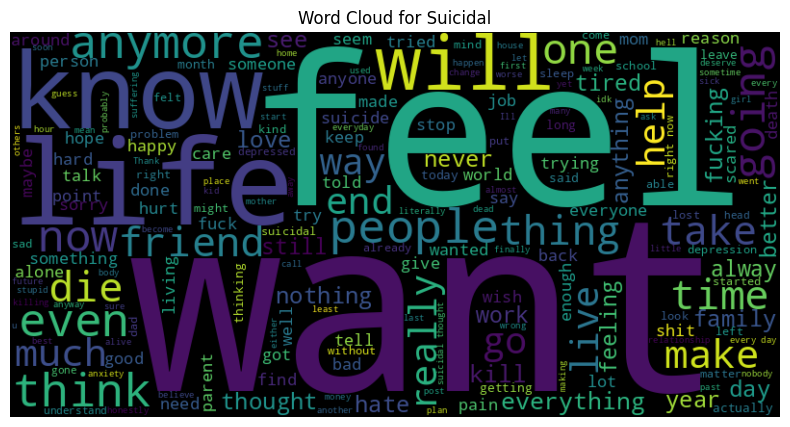

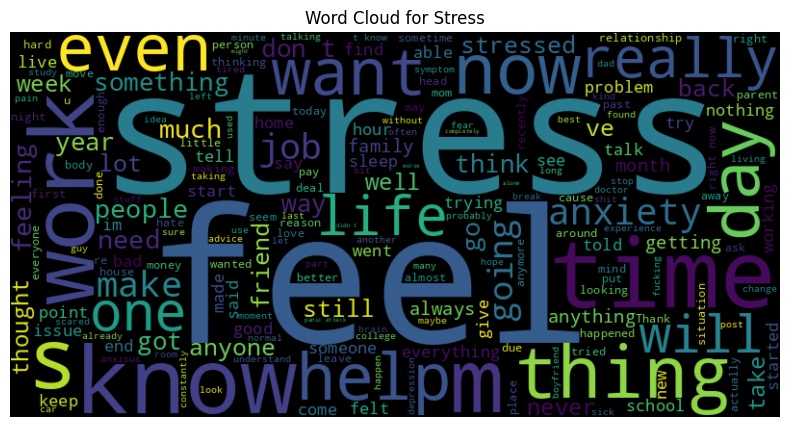

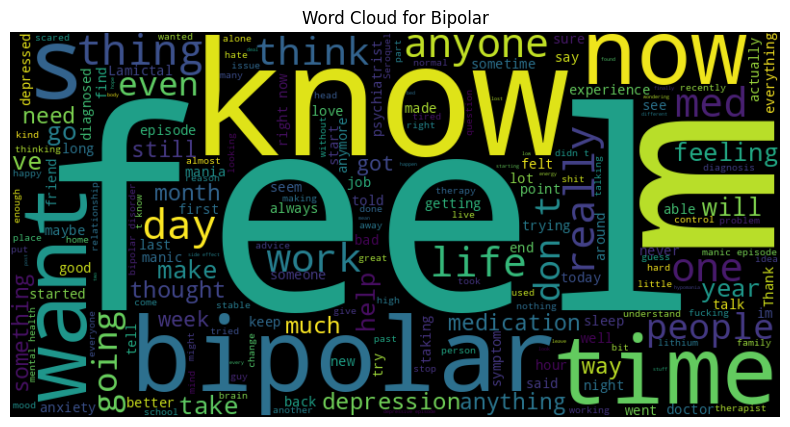

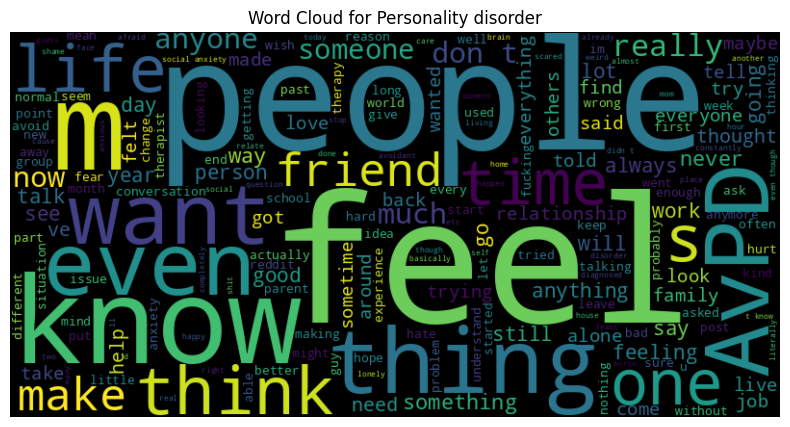

In [20]:
# Create a function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each status
statuses = df1['status'].unique()

for status in statuses:
    status_text = ' '.join(df1[df1['status'] == status]['statement'])
    generate_word_cloud(status_text, title=f'Word Cloud for {status}')

We can see for anxiety, stress, and bipolar disorder that "anxiety" and "stress", "bipolar" are the most popular words. "AVPD", "people", and "feel" are the most common words for personality disorder. These words tend to make sense since the words are the literal statuses. Avoidant Personality Disorder (AVPD) is a mental health condition marked by chronic feelings of inadequacy, extreme sensitivity to criticism, and a strong desire to avoid social interactions due to fear of rejection and is a medical condition for a personality disorder.

"Will", "want", "know" are the most common words for normal. "Life", "feel", "want" are the most common words for suicidal. Many people with suicidal tendencies tend to talk about their lives. The words for "normal" status tend to have positive connotations especially "want" and "will", especially for a "will" to live.

These words seem to be preliminary indicators to help determine the status based on their statement. We can compare once we calculate sentiment scores.  

We want to conduct bi-grams and tri-grams analysis for these reasons:
Contextual Insights: Bi-grams and tri-grams capture phrases and context that single words (unigrams) might miss. This is particularly important in mental health, where phrases like "feeling down" or "very anxious" provide more insight than individual words.

Improved Sentiment Detection: Phrases often convey sentiment more accurately than single words. For example, "not happy" is a negative sentiment that might be missed if only individual words are considered.

Identifying Common Themes: Visualizing bi-grams and tri-grams helps identify common themes and expressions in the dataset. This can reveal patterns in how people express their mental health experiences.

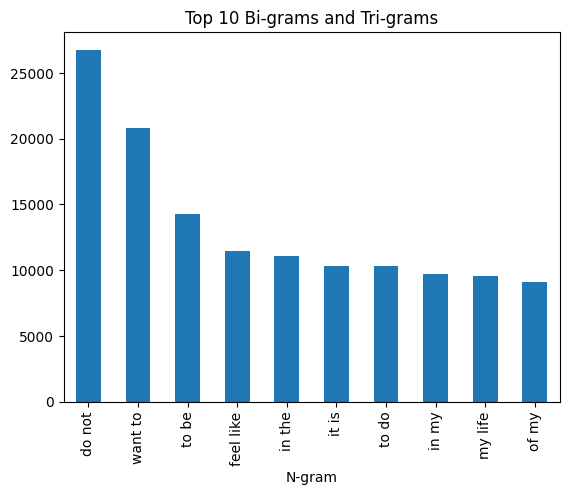

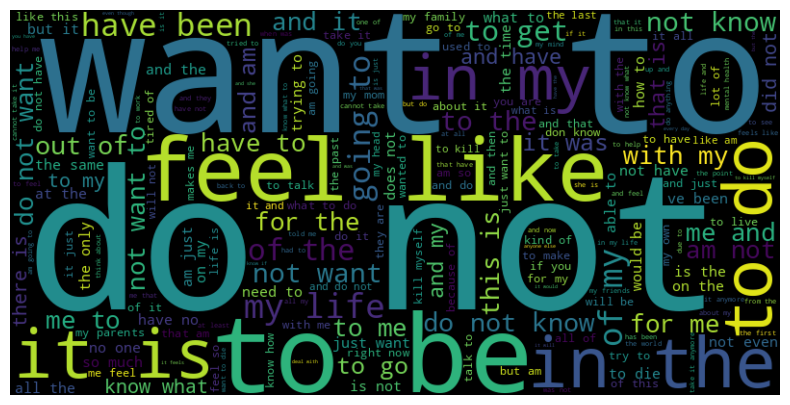

In [21]:
# import tokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization and N-gram generation
# Create a CountVectorizer object with ngram_range set to (2, 3) to generate bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))

# Fit and transform the 'statement' column of the DataFrame to generate the n-grams
X = vectorizer.fit_transform(df1['statement'])

# Frequency distribution
# Sum the occurrences of each n-gram across all documents
sum_words = X.sum(axis=0)

# Create a list of tuples where each tuple contains an n-gram and its corresponding frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of tuples by frequency in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# DataFrame for visualization
# Convert the list of tuples into a DataFrame for easier visualization
df_freq = pd.DataFrame(words_freq, columns=['N-gram', 'Frequency'])

# Bar plot
# Plot the top 10 most frequent n-grams as a bar plot
df_freq.head(10).plot(kind='bar', x='N-gram', y='Frequency', legend=False)
plt.title('Top 10 Bi-grams and Tri-grams')
plt.show()

# Word cloud
# Generate a word cloud from the n-gram frequencies
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(words_freq))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This visualizes the most common bi-grams and tri-grams in our dataset, providing insights into common phrases and patterns, which is particularly useful for sentiment analysis in mental health. It helps identify key expressions and themes that might indicate different emotional states or communication gaps. The top ten are do not, want to, to be, feel like, in the, it is, to do, in my, my life, and of my.

Negative Sentiments: Phrases like "do not" and "feel like" might indicate negative sentiments or expressions of reluctance and emotional states. These bi-grams can help identify statements where individuals are expressing dissatisfaction or discomfort.

Desires and Intentions: Bi-grams such as "want to" and "to do" suggest expressions of desires, intentions, or plans. Analyzing these can reveal what individuals are striving for or what actions they are considering, which can be linked to their mental state.

Self-Reflection: Phrases like "in my," "my life," and "of my" indicate self-reflection and personal experiences. These bi-grams can help identify statements where individuals are discussing their personal lives and feelings, which are critical for understanding their mental health.

General Context: Bi-grams like "to be," "in the," and "it is" provide general context and can be part of various expressions. While they might not directly indicate sentiment, they help in understanding the structure and flow of the text.

### Week 4 Code- Preprocessing the data

df1 is the dataframe that does not have any of the missing values.
filtered_df is the dataframe with the outliers removed and no missing values. We will keep the outliers since sentiment analysis often has extreme reviews (e.g., very short or long ones) that can hold strong emotions, valuable for classification especially when using non-transformer models. For transformer models, we may remove outliers by shortening the word length input or use filtered_df to reduce computational time without sacrificing performance. For now, we will use df1 to preprocess the data. Transformer models tend to have different preprocessing techniques anyways. 

⚠ **Warning:** After installing `imbalanced-learn`, please **restart the kernel** for the changes to take effect.  

You can do this in Jupyter Notebook by clicking:  
**Kernel** → **Restart Kernel**


In [22]:
# install packages 
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
# import packages
import seaborn as sns

import re
import random
from imblearn.over_sampling import RandomOverSampler # used for oversampling
from scipy.sparse import hstack, csr_matrix  # To combine sparse matrices

import nltk # nlp package
nltk.download('punkt') # install punkt tokenizer
from nltk.tokenize import word_tokenize # tokenize the text
from nltk.stem import PorterStemmer # stem the text

from sklearn.feature_extraction.text import TfidfVectorizer # used for tf-idf
from sklearn.model_selection import GridSearchCV # used to find the best parameters
from sklearn.preprocessing import LabelEncoder # used to encode categorical variables


[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     geean/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Remove duplicates based on 'statement'
df_unique = df1.drop_duplicates(subset=['statement'])

df_unique.head()

statement   status  statement_len
0                                         oh my gosh  Anxiety              3
1  trouble sleeping, confused mind, restless hear...  Anxiety             10
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14
3  I've shifted my focus to something else but I'...  Anxiety             11
4  I'm restless and restless, it's been a month n...  Anxiety             14

## Why Add Sentence & Character Length in NLP?

Enhancing NLP models like **Naïve Bayes** and **XGBoost** with numerical metadata (e.g., sentence length, character count) improves performance by capturing structural insights.

### 🚀 Benefits:
- **Structural Insights**  
  - **Sentence Length**: Differentiates concise vs. verbose texts (e.g., tweets vs. articles).  
  - **Character Length**: Indicates complexity, verbosity, or spam tendencies.  

- **Better Model Interpretability**  
  - Helps tree-based models (e.g., XGBoost) make effective splits.  
  - Useful for readability assessment, spam detection, and authorship identification.  

- **Performance Boost**  
  - Combines well with TF-IDF, embeddings, and n-grams.  
  - Provides independent signals, improving classification accuracy.  

### 🎯 Key Use Cases:
- **Sentiment Analysis**: Short reviews are often more direct (positive/negative).  


In [25]:
# Calculate the number of characters and sentences
# install nltk downloader punkt_tab for sentences
nltk.download('punkt_tab')

df_unique['num_of_characters'] = df_unique['statement'].str.len()
df_unique['num_of_sentences'] = df_unique['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Generate descriptive statistics
description = df_unique[['num_of_characters', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

[nltk_data] Downloading package punkt_tab to /home/jupyter-
[nltk_data]     geean/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


       num_of_characters  num_of_sentences
count       51073.000000      51073.000000
mean          575.375051          6.249251
std           847.661079         10.762749
min             2.000000          1.000000
25%            79.000000          1.000000
50%           313.000000          3.000000
75%           745.000000          8.000000
max         32759.000000       1260.000000


## Text Preprocessing

### Convert to lowercase for uniformity

In [26]:
# convert to lowercase
#rename columns
df_unique.rename(columns={'statement': 'original_statement'}, inplace=True)  

# create a new cleaned statement column called statement
df_unique['statement']=df_unique['original_statement'].str.lower()
# see the first ten rows
df_unique.head()

original_statement   status  statement_len  \
0                                         oh my gosh  Anxiety              3   
1  trouble sleeping, confused mind, restless hear...  Anxiety             10   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14   
3  I've shifted my focus to something else but I'...  Anxiety             11   
4  I'm restless and restless, it's been a month n...  Anxiety             14   

   num_of_characters  num_of_sentences  \
0                 10                 1   
1                 64                 2   
2                 78                 2   
3                 61                 1   
4                 72                 2   

                                           statement  
0                                         oh my gosh  
1  trouble sleeping, confused mind, restless hear...  
2  all wrong, back off dear, forward doubt. stay ...  
3  i've shifted my focus to something else but i'...  
4  i'm restless and restless, it's been a month n...

### Remove URLS and other text, punctuation, and special text
To remove specific patterns such as URLs or other unwanted text (like ```[View Poll](https://www.reddit.com/poll/...)```) from a column in a pandas DataFrame, we can use regular expressions with the re module or pandas built-in string methods. This will help us get cleaner relevant text.

In [27]:
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the function to the 'statement' column
df_unique['statement'] = df_unique['statement'].apply(remove_patterns)
# see the first ten rows
df_unique.head()

original_statement   status  statement_len  \
0                                         oh my gosh  Anxiety              3   
1  trouble sleeping, confused mind, restless hear...  Anxiety             10   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14   
3  I've shifted my focus to something else but I'...  Anxiety             11   
4  I'm restless and restless, it's been a month n...  Anxiety             14   

   num_of_characters  num_of_sentences  \
0                 10                 1   
1                 64                 2   
2                 78                 2   
3                 61                 1   
4                 72                 2   

                                           statement  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  all wrong back off dear forward doubt stay in ...  
3  ive shifted my focus to something else but im ...  
4  im restless and restless its been a month now ...

### Tokenization 
This is when the statements are split into words/tokens.
Tokenization is **essential in NLP** as it breaks text into smaller units (tokens), making it **processable by models** like Naïve Bayes, XGBoost, and Transformers.

### 🔹 Key Benefits  
- **Structures Raw Text** → Converts unstructured text into a usable format.  
- **Boosts Model Performance** → Enables better text classification, sentiment analysis, etc.  
- **Handles Language Variability**  
  - **Word-based**: `"I love NLP"` → `["I", "love", "NLP"]`  
  - **Subword-based (BPE, WordPiece)**: `"unhappiness"` → `["un", "happiness"]`  
  - **Character-based**: Useful for languages without spaces (e.g., Chinese).  
- **Improves Efficiency** → Reduces complexity for machine learning models.    


In [28]:
# Apply word_tokenize to each element in the 'statement' column
df_unique['tokens'] = df_unique['statement'].apply(word_tokenize)
# see the first ten rows
df_unique.head()

original_statement   status  statement_len  \
0                                         oh my gosh  Anxiety              3   
1  trouble sleeping, confused mind, restless hear...  Anxiety             10   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14   
3  I've shifted my focus to something else but I'...  Anxiety             11   
4  I'm restless and restless, it's been a month n...  Anxiety             14   

   num_of_characters  num_of_sentences  \
0                 10                 1   
1                 64                 2   
2                 78                 2   
3                 61                 1   
4                 72                 2   

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                              tokens  
0                                     [oh, my, gosh]  
1  [trouble, sleeping, confused, mind, restless, ...  
2  [all, wrong, back, off, dear, forward, doubt, ...  
3  [ive, shifted, my, focus, to, something, else,...  
4  [im, restless, and, restless, its, been, a, mo...

## 🌱 What is Stemming & Why is it Important in NLP?

**Stemming** reduces words to their root form by removing prefixes/suffixes, helping **normalize text** and **reduce dimensionality** in NLP.

### 🔹 How It Works  
- `"running"` → `"run"`  
- `"happily"` → `"happi"`  
- `"flies"` → `"fli"`  

### 🔥 Why It Matters  
- **Reduces Vocabulary Size** → Groups similar words.  
- **Boosts Search & NLP Models** → `"run"` and `"running"` treated alike.  
- **Speeds Up Processing** → Fewer unique tokens.  

### ⚠️ Limitation  
- Can produce **incorrect roots** (`"better"` → `"bet"`).  
- **Lemmatization** (more accurate) uses a dictionary.  

### 🎯 Takeaway  
Stemming **simplifies text, reduces redundancy, and improves efficiency** in NLP. 🚀  


In [29]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df_unique['tokens_stemmed'] = df_unique['tokens'].apply(stem_tokens)

# print the first ten rows
df_unique.head()


original_statement   status  statement_len  \
0                                         oh my gosh  Anxiety              3   
1  trouble sleeping, confused mind, restless hear...  Anxiety             10   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety             14   
3  I've shifted my focus to something else but I'...  Anxiety             11   
4  I'm restless and restless, it's been a month n...  Anxiety             14   

   num_of_characters  num_of_sentences  \
0                 10                 1   
1                 64                 2   
2                 78                 2   
3                 61                 1   
4                 72                 2   

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                              tokens  \
0                                     [oh, my, gosh]   
1  [trouble, sleeping, confused, mind, restless, ...   
2  [all, wrong, back, off, dear, forward, doubt, ...   
3  [ive, shifted, my, focus, to, something, else,...   
4  [im, restless, and, restless, its, been, a, mo...   

                                      tokens_stemmed  
0                                         oh my gosh  
1  troubl sleep confus mind restless heart all ou...  
2  all wrong back off dear forward doubt stay in ...  
3  ive shift my focu to someth els but im still w...  
4  im restless and restless it been a month now b...

##  Not Removing Stop Words

Stop words are **frequent words** that may not carry significant meaning in NLP tasks.  

### 📝 **General Stop Words**  
- **Articles** → *a, an, the*  
- **Prepositions** → *in, on, at, by, with*  
- **Pronouns** → *I, you, he, she, it, they*  
- **Conjunctions** → *and, but, or, so*  
- **Auxiliary Verbs** → *is, are, was, were, have, do, does*  

For **mental health sentiment analysis**, it's best to **keep stop words** because:  

### 🔹 Context Matters  
- Words like **"not," "never," "very"** can flip sentiment.  
  - *"not okay"* ≠ *"okay"*  

### 🔹 Emotional Expressions  
- Stop words are essential for capturing **feelings and emotions**.  
  - *"I feel so lost"* carries more meaning than *"feel lost"*.  

We can see from the word clouds that there are not many stop words that are in bold so we will not remove them.  


In [30]:
# Now we create our dataset for train-validation-test adding the numerical features

In [31]:
X = df_unique[['tokens_stemmed', 'num_of_characters', 'num_of_sentences']]
y = df_unique['status']

## 🔠 Why Use Label Encoding for Categorical Variables?  

Label encoding converts **categorical target variables (Y)** into numerical format for machine learning models.  

### 🔹 Why is it Necessary?  
- **ML Models Require Numeric Input** → Algorithms like **XGBoost, Naïve Bayes, SVM** can’t process text labels.  
- **Standardizes Target Variable** → Maps categories to integers (*e.g., "positive" → 2, "neutral" → 1, "negative" → 0*).  
- **Compatible with Many Models** → Needed for both **classification** and **regression tasks**.  


In [32]:
# label encode our categorical variables for y 
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

### Train-Validation-Test Split

Most common splits are 80-20 so we will use this split here. We will also create a validation set that is 10% and the test set is 10%. The final splits will be 80-10-10.

I did these splits, since this is a common split in machine learning and data science but also because with 80% of the data as a training dataset, a large portion ensures that the model has enough data to learn from, which helps in capturing the underlying patterns and relationships in the data. With a Validation Set of 10%, it can tune hyperparameters and make decisions about the model architecture and helps prevent overfitting by providing a checkpoint to evaluate the model's performance on unseen data during the training process. With a 10% Test Set, we can evaluate the model's performance after it has been trained and validated and 10% is a large enough size given that we have approximately 50,000 data points. The 80-10-10 split is a balanced approach that ensures the model has sufficient data for training while also providing enough data for validation and testing to ensure robust performance

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%) sets
train_x, temp_x, train_y, temp_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation (50%) and test (50%) sets
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_x)}")
print(f"Validation set size: {len(val_x)}")
print(f"Test set size: {len(test_x)}")


Training set size: 40858
Validation set size: 5107
Test set size: 5108


### Week 5 Code-  Feature Engineering, Data Augmentation and Reducing Dimensionality

We created the number of sentences and the character length as new features from the "statement" column earlier. 

Since we only had "statement" column to begin with, we did not need to reduce dimensionality from our original dataset. However, we decided to remove statement_length from the data since these are very similar to number of characters and number of sentences.

Enhancing NLP models like Naïve Bayes and XGBoost with numerical metadata significantly improves performance by capturing valuable structural insights.  Sentence length, for example, differentiates concise texts like tweets from verbose articles.  Character count can indicate text complexity, verbosity, or even spam tendencies.  These structural features not only offer better model interpretability, aiding tree-based models like XGBoost in making effective splits, but also boost overall performance.  This metadata combines well with traditional NLP features like TF-IDF, embeddings, and n-grams, providing independent signals that enhance classification accuracy.  Applications include readability assessment, spam detection, and even authorship identification, demonstrating the broad utility of incorporating numerical metadata into NLP workflows.

In [34]:
# look at training set to see the new features that we built earlier such as num_of_characters and num_of_sentences
train_x.head()

tokens_stemmed  num_of_characters  \
1488   my children were given a no limit theme whi ar...                131   
21192  i feel complet lost with thing too mani overwh...               5371   
23638  hi i am an incom senior in highschool and my m...                544   
35989  never been to war but i get terribl nightmar t...                101   
44721  justagirl 9 that s great about your licens wis...                 78   

       num_of_sentences  
1488                  1  
21192                41  
23638                 6  
35989                 2  
44721                 1

### Convert Text to Features using tf-idf to reduce dimensionality

Now, we will transform tokens (words) into numerical values that represent the importance of words in a document relative to a collection of documents. This helps highlight unique words in a document while downplaying common ones, making it easier for machine learning models to identify relevant patterns and make better predictions.

TF-IDF plays a crucial role in sentiment analysis by weighting the importance of words within a document relative to the entire collection of documents (corpus).  While it doesn't strictly *reduce* dimensionality like PCA by eliminating features (words), it effectively manages complexity by assigning weights that reflect a word's relevance.  Term Frequency (TF) measures how often a word appears in a specific document, while Inverse Document Frequency (IDF) quantifies how rare that word is across the corpus.  Common words like "the" or "a" appear frequently in almost all documents, resulting in low IDF scores.  Conversely, words that appear frequently in some documents but rarely elsewhere have high IDF scores.  The TF-IDF score, the product of TF and IDF, reflects the overall importance of a word in a particular document within the larger context of the corpus.

This weighting scheme is key to sentiment analysis because it downplays the influence of common, often uninformative words that contribute little to sentiment.  These words, while frequent, are essentially noise.  At the same time, TF-IDF highlights the words that are most discriminative of sentiment, those that appear frequently in documents expressing a particular sentiment but rarely elsewhere.  By emphasizing these key terms, TF-IDF effectively reduces the impact of less relevant dimensions (words), allowing sentiment analysis models to focus on the most informative features.  This leads to improved performance by making the model more robust to the curse of dimensionality, even though the actual number of features isn't reduced.  In short, TF-IDF acts as a feature weighting mechanism, prioritizing the signal (sentiment indicators) over the noise (common words).


In [35]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens_stemmed' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_train_tfidf = vectorizer.fit_transform(train_x['tokens_stemmed'])
X_val_tfidf = vectorizer.transform(val_x['tokens_stemmed'])
test_x_tfidf = vectorizer.transform(test_x['tokens_stemmed'])

# 3. Numerical Feature Extraction
X_train_num = csr_matrix(train_x[['num_of_characters', 'num_of_sentences']].values)
X_val_num = csr_matrix(val_x[['num_of_characters', 'num_of_sentences']].values)
test_x_num = csr_matrix(test_x[['num_of_characters', 'num_of_sentences']].values)

# 4. Combine Features
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_val_combined = hstack([X_val_tfidf, X_val_num])
test_x_combined = hstack([test_x_tfidf, test_x_num])

# Print number of feature words
print('Number of feature words:', len(vectorizer.get_feature_names_out()))


Number of feature words: 50000


In [36]:
X_train_combined.shape

(40858, 50002)

## ⚖️ Why Oversampling for an Imbalanced Dataset?  

In an **imbalanced dataset**, the model may favor the majority class, leading to **biased predictions**. **Oversampling** helps balance the dataset by increasing minority class samples.

### 🔹 Why is Oversampling Needed?  
- **Prevents Majority Class Bias** → Ensures the model learns patterns from both classes.  
- **Improves Model Performance** → Leads to better recall, F1-score, and generalization.  
- **Enhances Minority Class Representation** → Avoids underestimating rare but important cases.

### 🔥 Why Does Random Over-Sampling Work Best?   
✅ **Maintains Original Data Distribution** → Simply duplicates minority class samples, avoiding synthetic noise (SMOTE).  
✅ **Preserves Minority Class Variability** → Unlike SMOTE, which may create unrealistic synthetic samples.  
✅ **Avoids Data Loss** → Unlike Under-Sampling, which removes majority class samples and risks losing valuable information.


In [37]:
# Apply Random Over-Sampling on the vectorized data
ros = RandomOverSampler(random_state=101)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_combined,train_y)

In [38]:
# see the new dataset
X_train_resampled.shape

(89215, 50002)

### Week 6 Code

### Logistic Regression for NLP Sentiment Analysis in Mental Health

#### Why Logistic Regression is Good for NLP Sentiment Analysis

Logistic regression is a popular choice for sentiment analysis in NLP, especially in the context of mental health, due to several reasons:

- **Simplicity and Interpretability**: Logistic regression is easy to implement and interpret. The coefficients can provide insights into the importance of different features (words or phrases) in predicting sentiment.
- **Efficiency**: It is computationally efficient and can handle large datasets, making it suitable for real-time applications.
- **Performance**: Logistic regression often performs well on text classification tasks, providing a strong baseline for more complex models.
- **Regularization**: It supports regularization techniques (L1 and L2) to prevent overfitting, which is crucial when dealing with high-dimensional text data.

#### Multiclass Classification Using Logistic Regression
One-vs-Rest (OvR) Strategy
The one-vs-rest (OvR) strategy is used for multi-class classification problems. Here's how it works:

Binary Classifiers: For a classification problem with N classes, the OvR strategy involves training N separate binary classifiers. Each classifier is responsible for distinguishing one class from all the others.

Training: Each binary classifier is trained to predict whether a given instance belongs to its specific class (positive class) or to any of the other classes (negative class). 
Prediction: When making predictions, each classifier outputs a probability or score indicating how likely an instance belongs to its class. The final prediction is the class with the highest probability or score among all classifiers.


## Model Comparisons: Logistic Regression with Regularization

Here's a comparison of three logistic regression models with varying regularization:

**Model 1: Logistic Regression with L1 Regularization**

*   `solver='liblinear'`: Uses the 'liblinear' solver, suitable for small datasets.
*   `penalty='l1'`: Applies L1 regularization (Lasso), which can help with feature selection by shrinking some coefficients to zero.
*   `C=10`: Inverse of regularization strength. A higher value of C means less regularization.
*   `random_state=101`: Ensures reproducibility by setting a seed for the random number generator.

**Model 2: Logistic Regression with L2 Regularization**

*   `solver='liblinear'`: Uses the 'liblinear' solver, suitable for small datasets.
*   `penalty='l2'`: Applies L2 regularization (Ridge), which helps prevent overfitting by shrinking the coefficients but not to zero.
*   `C=10`: Inverse of regularization strength. A higher value of C means less regularization.
*   `random_state=101`: Ensures reproducibility by setting a seed for the random number generator.

**Model 3: Logistic Regression with L1 Regularization and Stronger Regularization**

*   `solver='liblinear'`: Uses the 'liblinear' solver, suitable for small datasets.
*   `penalty='l1'`: Applies L1 regularization (Lasso), which can help with feature selection by shrinking some coefficients to zero.
*   `C=5`: Inverse of regularization strength. A lower value of C means stronger regularization compared to Model 1.
*   `random_state=101`: Ensures reproducibility by setting a seed for the random number generator.

**Summary of Differences:**

The key difference between these models is the type and strength of regularization. Models 1 and 3 use L1 regularization, while Model 2 uses L2. Model 3 applies stronger L1 regularization than Model 1 due to the lower value of `C`.  The choice of L1 vs. L2 and the optimal value of `C` depends on the specific dataset and the goals of the modeling (e.g., feature selection, preventing overfitting).

In [39]:
# Define a dictionary of classifiers with their specific parameters.
# import packages needed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classifiers = {
    'Logistic Regression 1': LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101),
    'Logistic Regression 2': LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=101),
    'Logistic Regression 3': LogisticRegression(solver='liblinear', penalty='l1', C=5, random_state=101)
}
 

#### Training the Model and Calculating the Metrics Commenting this out to speed up time!

In [40]:
# # create an empty list to store accuracy scores
# accuracy_scores = []
# training_accuracy_scores = []

# # create for loop to train, predict, and evaluate each model as well as the training, validation accuracy, confusion matrix and classification report
# for name, clf in classifiers.items():
#     clf.fit(X_train_resampled, y_train_resampled)

#     # Calculate and store training accuracy
#     y_train_pred = clf.predict(X_train_resampled)
#     training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
#     training_accuracy_scores.append(training_accuracy)

#     # Calculate and store validation accuracy
#     y_pred = clf.predict(X_val_combined)
#     accuracy = accuracy_score(val_y, y_pred)
#     accuracy_scores.append(accuracy)

#     print("\n")
#     print(f"For {name}:")
#     print(f"  Training Accuracy: {training_accuracy}")
#     print(f"  Validation Accuracy: {accuracy}")

#     # Compute and display training confusion matrix and classification report
#     print("\nTraining Set Metrics:")
#     conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
#     print(classification_report(y_train_resampled, y_train_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Training Confusion Matrix for {name}')
#     plt.show()

#     # Compute and display validation confusion matrix and classification report
#     print("\nValidation Set Metrics:")
#     conf_matrix_val = confusion_matrix(val_y, y_pred)
#     print(classification_report(val_y, y_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Validation Confusion Matrix for {name}')
#     plt.show()

# # Print a summary of accuracy scores at the end
# print("\nSummary of Accuracy Scores:")
# for i, (name, _) in enumerate(classifiers.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores[i]}")

# # (Optional) You can further analyze or compare accuracy scores here for overfitting For example:
# for i, (name, _) in enumerate(classifiers.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores[i]}")
#     difference = training_accuracy_scores[i] - accuracy_scores[i]
#     print(f"  Difference: {difference}")  # This would display the difference between the training and validation accuracy
#     if difference > 0.1: # difference is greater than 0.1
#         print("    Possible Overfitting")
#     elif difference < 0.02: # difference is less than 0.02
#         print("    Possible Underfitting")
#     else:
#         print("    Model is likely a good fit")


## Model Comparison

Here's a comparison of three models based on their training and validation accuracies:

| Model | Training Accuracy | Validation Accuracy |
|---|---|---|
| Model 1 | 0.99 | 0.74 |
| Model 2 | 0.89 | 0.757 |
| Model 3 | 0.99 | 0.751 |

**Best Model:** Model 2

**Reason:** Model 2 has the highest validation accuracy (0.757) and shows less sign of overfitting compared to Model 1 and Model 3, which have a large gap between training and validation accuracy.  A smaller difference between training and validation accuracy suggests better generalization to unseen data. Furthermore, Model 2 had the highest recall scores for more of the classifiers ( 5 highest recall values).

### Week 7 Code


## Bernoulli Naive Bayes for Sentiment Analysis for Mental Health

Bernoulli Naive Bayes is a popular choice for sentiment analysis, especially in domains like mental health, due to several key advantages:

### 1. Focus on Presence of Words  
- **Binary Features**: Bernoulli Naive Bayes works with binary features – whether a word is present or absent in a text. This is well-suited for sentiment analysis where the presence of certain words (e.g., *"sad," "anxious," "hopeless"*) can strongly indicate mental health concerns.  
- **Simplicity**: It doesn't consider the frequency of words, which can be less important than their mere presence in identifying sentiment related to mental health.  

### 2. Efficiency with High-Dimensional Data  
- **Text Data**: Mental health texts often involve diverse vocabularies and high dimensionality. Bernoulli Naive Bayes handles this efficiently, making it suitable for large datasets or situations requiring quick analysis.  

### 3. Interpretability and Explainability  
- **Transparency**: Understanding why a model classifies a text as expressing a particular sentiment is crucial in mental health. Bernoulli Naive Bayes offers some level of interpretability, allowing you to see which words contribute most to the classification. This can be valuable for researchers and clinicians.  

### 4. Sensitivity to Subtle Cues  
- **Detecting Subtleties**: In mental health contexts, subtle language cues can be significant. While the "naive" assumption of word independence has limitations, it can sometimes be beneficial. By treating words independently, the model might pick up on subtle signals that would be missed if it focused heavily on word combinations or context.  

### 5. Suitability for Imbalanced Data  
- **Prevalence of Challenges**: Mental health datasets often have imbalanced classes, with fewer instances of certain conditions. Bernoulli Naive Bayes can sometimes perform well with imbalanced data, making it relevant for mental health applications where some conditions are less prevalent.  


## Second Set of Classifiers for Naive Bayes  

Each classifier applies **Bernoulli Naive Bayes** with a different `alpha` value. The `alpha` parameter controls **Laplace smoothing**, which prevents the model from assigning zero probability to words that were not seen in the training data. It plays a crucial role in improving generalization and handling unseen words in text classification.  

### Effect of Different `alpha` Values:  

- **α = 0.1**: Low smoothing, making the model more sensitive to rare words.  
- **α = 1.0**: Default smoothing, providing a balance between sensitivity and generalization.  
- **α = 10.0**: Higher smoothing, reducing the impact of rare words by distributing probability more evenly.  


### Importance of `binarize=0.0`  

The `binarize` parameter ensures that the model works with **binary word features** (presence or absence of a word) rather than word frequency. This is particularly useful for **sentiment analysis in mental health** because:  

1. **Focus on Important Words**: Instead of considering how many times a word appears, the model only cares **whether** it appears, which can improve classification when key words (e.g., *"anxious," "hopeless," "sad"*) strongly indicate sentiment.  
2. **Reduces Noise**: In mental health text data, some words may appear frequently but are not necessarily relevant (e.g., filler words). Binarization helps eliminate this noise.  
3. **Works Well with BernoulliNB**: The Bernoulli Naive Bayes model assumes binary features by design, making `binarize=0.0` a natural choice.  


In [41]:
# create second set of classifiers for naive bayes
from sklearn.naive_bayes import BernoulliNB
classifiers2 = {
    'Bernoulli NB (alpha=0.1)': BernoulliNB(alpha=0.1, binarize=0.0),
    'Bernoulli NB (alpha=1.0)': BernoulliNB(alpha=1.0, binarize=0.0),
    'Bernoulli NB (alpha=10.0)': BernoulliNB(alpha=10.0, binarize=0.0), 
}

In [42]:
# # Now run the same training code from week 6 for week 7
# # create an empty list to store accuracy scores
# accuracy_scores2 = []
# training_accuracy_scores2 = []

# # create for loop to train, predict, and evaluate each model as well as the training, validation accuracy, confusion matrix and classification report
# for name, clf in classifiers2.items():
#     clf.fit(X_train_resampled, y_train_resampled)

#     # Calculate and store training accuracy
#     y_train_pred = clf.predict(X_train_resampled)
#     training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
#     training_accuracy_scores2.append(training_accuracy)

#     # Calculate and store validation accuracy
#     y_pred = clf.predict(X_val_combined)
#     accuracy = accuracy_score(val_y, y_pred)
#     accuracy_scores2.append(accuracy)

#     print("\n")
#     print(f"For {name}:")
#     print(f"  Training Accuracy: {training_accuracy}")
#     print(f"  Validation Accuracy: {accuracy}")

#     # Compute and display training confusion matrix and classification report
#     print("\nTraining Set Metrics:")
#     conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
#     print(classification_report(y_train_resampled, y_train_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Training Confusion Matrix for {name}')
#     plt.show()

#     # Compute and display validation confusion matrix and classification report
#     print("\nValidation Set Metrics:")
#     conf_matrix_val = confusion_matrix(val_y, y_pred)
#     print(classification_report(val_y, y_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Validation Confusion Matrix for {name}')
#     plt.show()

# # Print a summary of accuracy scores at the end
# print("\nSummary of Accuracy Scores:")
# for i, (name, _) in enumerate(classifiers2.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores2[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores2[i]}")

# # (Optional) You can further analyze or compare accuracy scores here for overfitting For example:
# for i, (name, _) in enumerate(classifiers2.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores2[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores2[i]}")
#     difference = training_accuracy_scores2[i] - accuracy_scores2[i]
#     print(f"  Difference: {difference}")  # This would display the difference between the training and validation accuracy
#     if difference > 0.1: # difference is greater than 0.1
#         print("    Possible Overfitting")
#     elif difference < 0.02: # difference is less than 0.02
#         print("    Possible Underfitting")
#     else:
#         print("    Model is likely a good fit")

## Model Comparison

Here's a comparison of three models based on their training and validation accuracies:

| Model | Training Accuracy | Validation Accuracy |
|---|---|---|
| Model 1 | 0.75 | 0.6389 |
| Model 2 | 0.71 | 0.6317 |
| Model 3 | 0.99 | 0.6052 |

**Best Model:** Model 2

**Reason:** Model 1 has the highest validation accuracy (0.6389). Furthermore, Model 2 had the highest recall scores for more of the classifiers ( 4 highest recall values) and has less overfitting making it the better model with accuracy close to Model 1. 

## Week 8 Code

# Why Use XGBoost for Sentiment Analysis in Mental Health?  

## 1. **Handles Imbalanced Data Well**  
Mental health sentiment datasets often have class imbalances (e.g., more neutral or non-anxious posts than highly anxious ones). XGBoost provides:  
- `scale_pos_weight` to balance classes  
- Custom loss functions to focus on minority class performance  

## 2. **Captures Complex Relationships**  
Mental health sentiment is influenced by nuanced language patterns, and XGBoost can:  
- Identify **non-linear** interactions between words and context  
- Work well with **engineered features** (e.g., TF-IDF scores, sentiment polarity, linguistic cues)  

## 3. **Works Well with Sparse Data**  
- Sentiment features (TF-IDF, word embeddings) are typically **high-dimensional and sparse**.  
- XGBoost efficiently handles sparse matrices with the `gpu_hist` tree method, making it fast even on large text datasets.  

## 4. **Robust to Noisy Data**  
- Mental health text data often contains **spelling errors, slang, and abbreviations**.  
- XGBoost's regularization (`reg_alpha`, `reg_lambda`) helps prevent overfitting on noisy text features.  

## 5. **Fast and Scalable**  
- XGBoost is optimized for **parallel computation** and can leverage GPUs for faster training.  
- It **scales well** to large datasets, making it ideal for **social media sentiment analysis**.  

## 6. **Feature Importance & Interpretability**  
- Unlike deep learning models, XGBoost provides **feature importance scores**, helping explain **which words or features impact mental health sentiment predictions**.  
- This interpretability is crucial for mental health professionals who need actionable insights.  

## 7. **Effective with Ensemble Methods**  
- Can be combined with **logistic regression, LSTMs, or BERT-based models** for improved sentiment classification.  
- Hybrid approaches like **XGBoost + Embeddings** can yield strong performance on mental health text data.  

---

### ✅ **Conclusion**  
XGBoost is a **powerful, efficient, and interpretable** model for **sentiment analysis in mental health**, especially when working with **engineered text features** like TF-IDF or word embeddings. It effectively handles imbalanced, sparse, and noisy data while providing insights into key predictive features. 🚀  

## Explanation of the Three XGBoost Models

Here's a breakdown of the three XGBoost classifiers defined in the `classifiers3` dictionary, highlighting the key differences in their hyperparameters and their intended effects:

**1. XGB_Conservative**

* **`learning_rate=0.05`**: This is a very low learning rate. It means the model takes small steps towards minimizing the loss function. This makes the learning process slower but can lead to more accurate models, especially if the data is noisy.
* **`max_depth=3`**: This limits the maximum depth of each tree in the ensemble. Shallow trees are less prone to overfitting but might not capture complex relationships in the data.
* **`n_estimators=200`**: This sets the number of boosting rounds (trees) to 200. While this is less than a more agressive model, it is still a substantial number of trees.
* **`subsample=0.6`**: This means that 60% of the training data is randomly sampled for each tree. This helps reduce overfitting and speeds up training.
* **`colsample_bytree=0.6`**: This means that 60% of the columns (features) are randomly sampled for each tree. This also helps reduce overfitting and increases diversity among the trees.
* **`reg_alpha=2` and `reg_lambda=2`**: These are L1 and L2 regularization terms, respectively. High values increase regularization, which adds a penalty for complex models, further reducing overfitting.
* **`tree_method='hist'`**: This uses the histogram-based algorithm for building trees, which is generally faster than the exact greedy algorithm, especially for large datasets.
* **Intended Effect**: This configuration is designed to be conservative, aiming for robustness and reduced overfitting. The low learning rate and strong regularization should produce a model that generalizes well, but it might take longer to train and might not capture very fine-grained patterns.

**2. XGB_Faster**

* **`learning_rate=0.1`**: This is a moderate learning rate, twice that of the "Conservative" model. It allows the model to learn faster.
* **`max_depth=3`**: Same as the "Conservative" model, limiting tree depth.
* **`n_estimators=200`**: Same number of trees as the "Conservative" model.
* **`subsample=0.7` and `colsample_bytree=0.7`**: These values are slightly higher than the "Conservative" model, meaning that more data and features are used for each tree. This can lead to slightly better performance but also slightly increased risk of overfitting.
* **`reg_alpha=1` and `reg_lambda=1`**: These regularization values are lower than the "Conservative" model, reducing the strength of regularization.
* **`tree_method='hist'`**: Same as the "Conservative" model.
* **Intended Effect**: This model aims for a balance between speed and performance. The increased learning rate and reduced regularization should make it faster than the "Conservative" model while maintaining reasonable accuracy.

**3. XGB_Fastest**

* **`learning_rate=0.2`**: This is a relatively high learning rate, allowing the model to converge even faster.
* **`max_depth=3`**: Same as the other models.
* **`n_estimators=200`**: Same number of trees as the other models.
* **`subsample=0.7` and `colsample_bytree=0.7`**: Same as the "Faster" model.
* **`reg_alpha=1` and `reg_lambda=1`**: Same as the "Faster" model.
* **`tree_method='hist'`**: Same as the other models.
* **Intended Effect**: This model is designed for speed. The high learning rate should result in the fastest training time among the three models. However, it might be more prone to overfitting and might not achieve the same level of accuracy as the other models, especially if the data is complex or noisy.

**Summary of Differences**

| Parameter        | XGB_Conservative | XGB_Faster | XGB_Fastest |
| :--------------- | :--------------- | :--------- | :---------- |
| `learning_rate`  | 0.05             | 0.1        | 0.2         |
| `subsample`      | 0.6              | 0.7        | 0.7         |
| `colsample_bytree` | 0.6              | 0.7        | 0.7         |
| `reg_alpha`      | 2                | 1          | 1           |
| `reg_lambda`     | 2                | 1          | 1           |

In essence, the models trade off between speed and potential accuracy:

* "Conservative" prioritizes accuracy and robustness, potentially at the cost of training time.
* "Faster" strikes a balance between speed and accuracy.
* "Fastest" prioritizes speed, potentially sacrificing some accuracy.

In [43]:
# Free up memory
import gc
gc.collect()

0

In [44]:
from xgboost import XGBClassifier

# Define three versions of the XGBClassifier with different hyperparameters
classifiers3 = {
    # 'XGB_Conservative': XGBClassifier(
    #     learning_rate=0.05,  
    #     max_depth=3,  # Reduced from 6
    #     n_estimators=200,  # Reduced from 800
    #     subsample=0.6,  
    #     colsample_bytree=0.6,  
    #     reg_alpha=2,  
    #     reg_lambda=2,   
    #     random_state=101,
    #     tree_method='hist',  
    # ),
    # 'XGB_Faster': XGBClassifier(
    #     learning_rate=0.1,  
    #     max_depth=3,  
    #     n_estimators=200,  
    #     subsample=0.7,  
    #     colsample_bytree=0.7,  
    #     reg_alpha=1,  
    #     reg_lambda=1,  
    #     random_state=101,
    #     tree_method='hist',
    # ),
    'XGB_Fastest': XGBClassifier(
        learning_rate=0.2,  
        max_depth=3,  
        n_estimators=200,  
        subsample=0.7,  
        colsample_bytree=0.7,  
        reg_alpha=1,  
        reg_lambda=1,  
        random_state=101,
        tree_method='hist',
    )
}


In [45]:
# # Now run the same training code from week 6 for week 8
# # create an empty list to store accuracy scores
# accuracy_scores3 = []
# training_accuracy_scores3 = []

# # create for loop to train, predict, and evaluate each model as well as the training, validation accuracy, confusion matrix and classification report
# for name, clf in classifiers3.items():
#     clf.fit(X_train_resampled, y_train_resampled)

#     # Calculate and store training accuracy
#     y_train_pred = clf.predict(X_train_resampled)
#     training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
#     training_accuracy_scores3.append(training_accuracy)

#     # Calculate and store validation accuracy
#     y_pred = clf.predict(X_val_combined)
#     accuracy = accuracy_score(val_y, y_pred)
#     accuracy_scores3.append(accuracy)

#     print("\n")
#     print(f"For {name}:")
#     print(f"  Training Accuracy: {training_accuracy}")
#     print(f"  Validation Accuracy: {accuracy}")

#     # Compute and display training confusion matrix and classification report
#     print("\nTraining Set Metrics:")
#     conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
#     print(classification_report(y_train_resampled, y_train_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Training Confusion Matrix for {name}')
#     plt.show()

#     # Compute and display validation confusion matrix and classification report
#     print("\nValidation Set Metrics:")
#     conf_matrix_val = confusion_matrix(val_y, y_pred)
#     print(classification_report(val_y, y_pred, target_names=lbl_enc.classes_))

#     sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Validation Confusion Matrix for {name}')
#     plt.show()

# # Print a summary of accuracy scores at the end
# print("\nSummary of Accuracy Scores:")
# for i, (name, _) in enumerate(classifiers3.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores3[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores3[i]}")

# # (Optional) You can further analyze or compare accuracy scores here for overfitting For example:
# for i, (name, _) in enumerate(classifiers3.items()):
#     print(f"{name}:")
#     print(f"  Training Accuracy: {training_accuracy_scores3[i]}")
#     print(f"  Validation Accuracy: {accuracy_scores3[i]}")
#     difference = training_accuracy_scores3[i] - accuracy_scores3[i]
#     print(f"  Difference: {difference}")  # This would display the difference between the training and validation accuracy
#     if difference > 0.1: # difference is greater than 0.1
#         print("    Possible Overfitting")
#     elif difference < 0.02: # difference is less than 0.02
#         print("    Possible Underfitting")
#     else:
#         print("    Model is likely a good fit")

## Model Comparison 

Here's a comparison of three models based on their training and validation accuracies:

| Model | Training Accuracy | Validation Accuracy |
|---|---|---|
| Model 1 | 0.80 | 0.74 |
| Model 2 | 0.84 | 0.76 |
| Model 3 | 0.89 | 0.77 |

**Best Model:** Model 3

**Reason:** Model 3 has the highest validation accuracy (0.77). Furthermore, Model 3 had the highest average recall scores. 

### Week 9 Code

Evaluation of the validation set is shown in previous code. Now we will create plots that show all models and their training accuracies, validation accuracies, training weighted average recall, and validation weighted average recall. 

In [46]:
# Comparing Models on Validation and Training Accuracy plots

# Model names for all 9 
model_names = ["Logistic Regression 1 (L1, C=10)", "Logistic Regression 2 (L2, C=10)","Logistic Regression 3 (L1, C=5)", 
               "Bernoulli NB 1 (alpha=0.1)", "Bernoulli NB 2 (alpha=1.0)", "Bernoulli NB 3 (alpha=10.0)",
               "XGBoost 1 (0.05 learning rate)", "XGBoost 2 (0.1 learning rate)", "XGBoost 3 (0.2 learning rate)"]


# # Combine the accuracy scores and model names
# training_accuracies_all = training_accuracy_scores + training_accuracy_scores2 + training_accuracy_scores3
# validation_accuracies_all = accuracy_scores + accuracy_scores2 + accuracy_scores3

# # Create a DataFrame for easy sorting and plotting
# data = pd.DataFrame({
#     'Model': model_names,
#     'Training Accuracy': training_accuracies_all,
#     'Validation Accuracy': validation_accuracies_all
# })

# # Plot training accuracies 
# plt.figure(figsize=(14, 7))
# sns.barplot(x='Model', y='Training Accuracy', data=data)
# plt.title("Training Accuracies (Simple to Complex Models)")
# plt.xlabel("Models")
# plt.ylabel("Training Accuracy")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# # Plot validation accuracies (sorted)
# plt.figure(figsize=(14, 7))
# sns.barplot(x='Model', y='Validation Accuracy', data=data)
# plt.title("Validation Accuracies (Simple to Complex Models)")
# plt.xlabel("Models")
# plt.ylabel("Validation Accuracy")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# #Combined Bar plot
# plt.figure(figsize=(14,7))

# plt.bar(data['Model'], data['Training Accuracy'], label = 'Training Accuracy', alpha = 0.7)
# plt.bar(data['Model'], data['Validation Accuracy'], label = 'Validation Accuracy', alpha = 0.7)
# plt.xticks(rotation=45, ha='right')
# plt.title('Training and Validation Accuracies Combined (Simple to Complex Models)')
# plt.ylabel('Accuracy')
# plt.xlabel('Models')
# plt.legend()
# plt.tight_layout()
# plt.show()

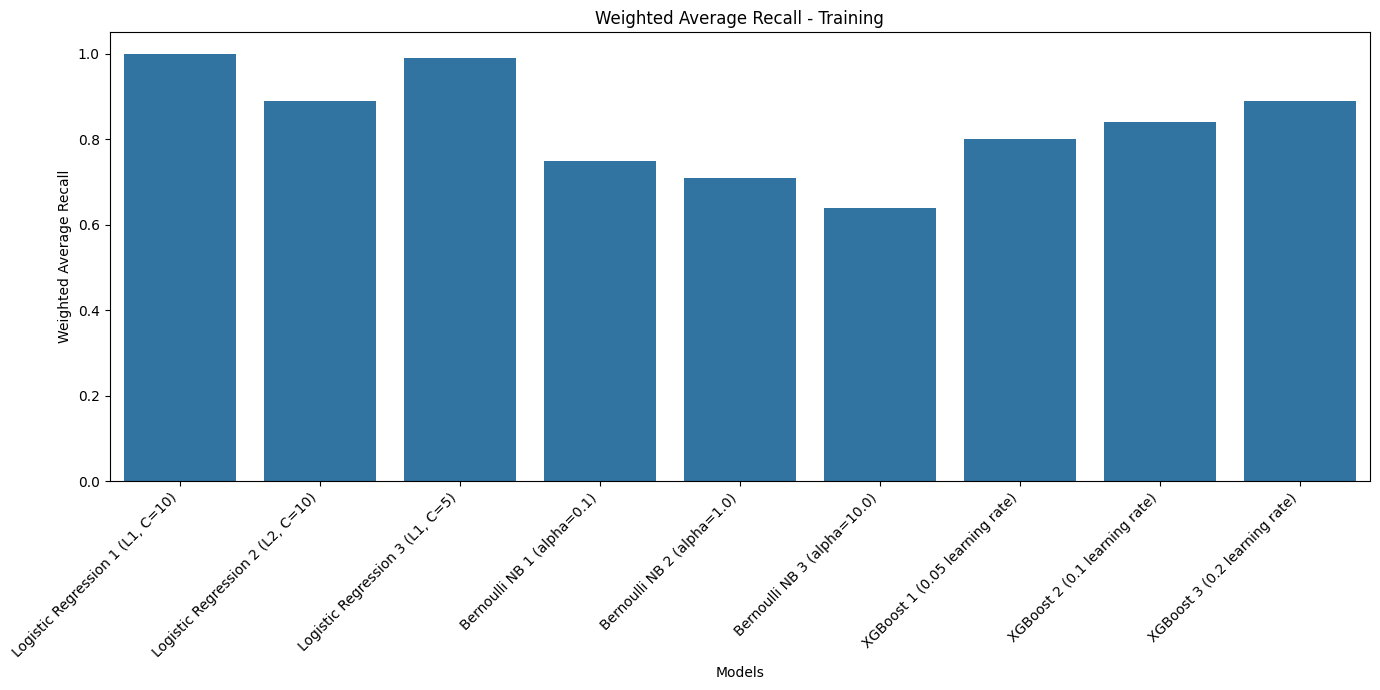

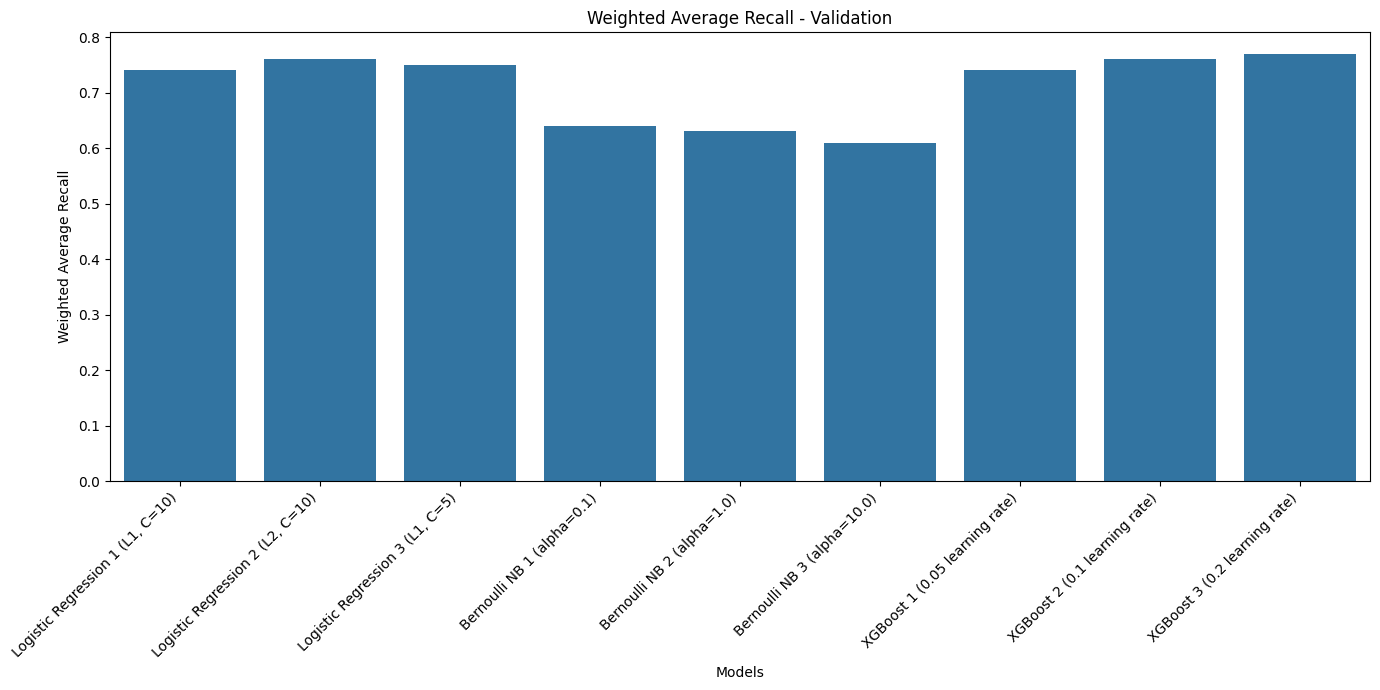

In [47]:
# Training and Validation Weighted Average Charts

#  weight_avg_recalls_all for training and validation pulled from classification report in the same order as the model names above.
weight_avg_recalls_all_train = [1.00, 0.89, 0.99, 0.75, 0.71, 0.64, 0.80, 0.84, 0.89]
weight_avg_recalls_all_val = [0.74, 0.76, 0.75, 0.64, 0.63, 0.61, 0.74, 0.76, 0.77]

# Create DataFrames for easy plotting
data_train = pd.DataFrame({
    'Model': model_names,
    'Training Recall': weight_avg_recalls_all_train
})

data_val = pd.DataFrame({
    'Model': model_names,
    'Validation Recall': weight_avg_recalls_all_val
})

# Bar plot for Training Recall
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Training Recall', data=data_train)
plt.xlabel("Models")
plt.ylabel("Weighted Average Recall")
plt.xticks(rotation=45, ha="right")
plt.title("Weighted Average Recall - Training")
plt.tight_layout()
plt.show()

# Bar plot for Validation Recall
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Validation Recall', data=data_val)
plt.xlabel("Models")
plt.ylabel("Weighted Average Recall")
plt.xticks(rotation=45, ha="right")
plt.title("Weighted Average Recall - Validation")
plt.tight_layout()
plt.show()

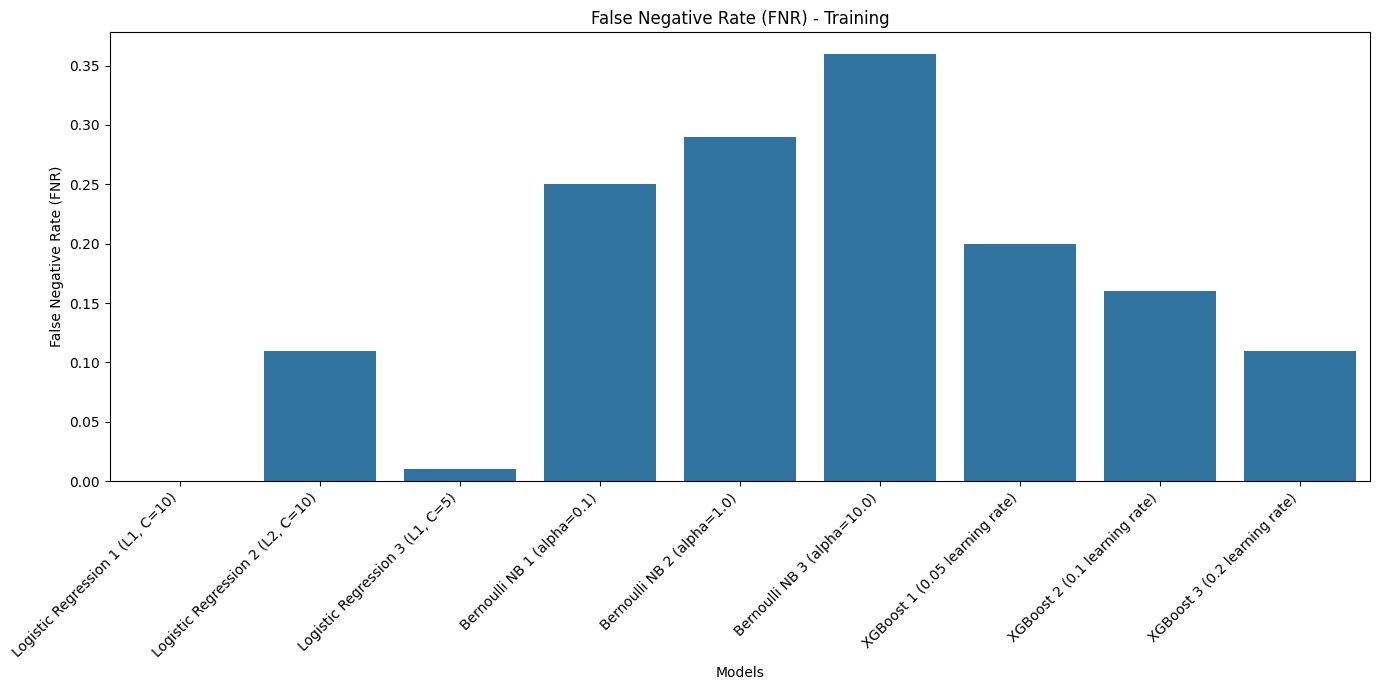

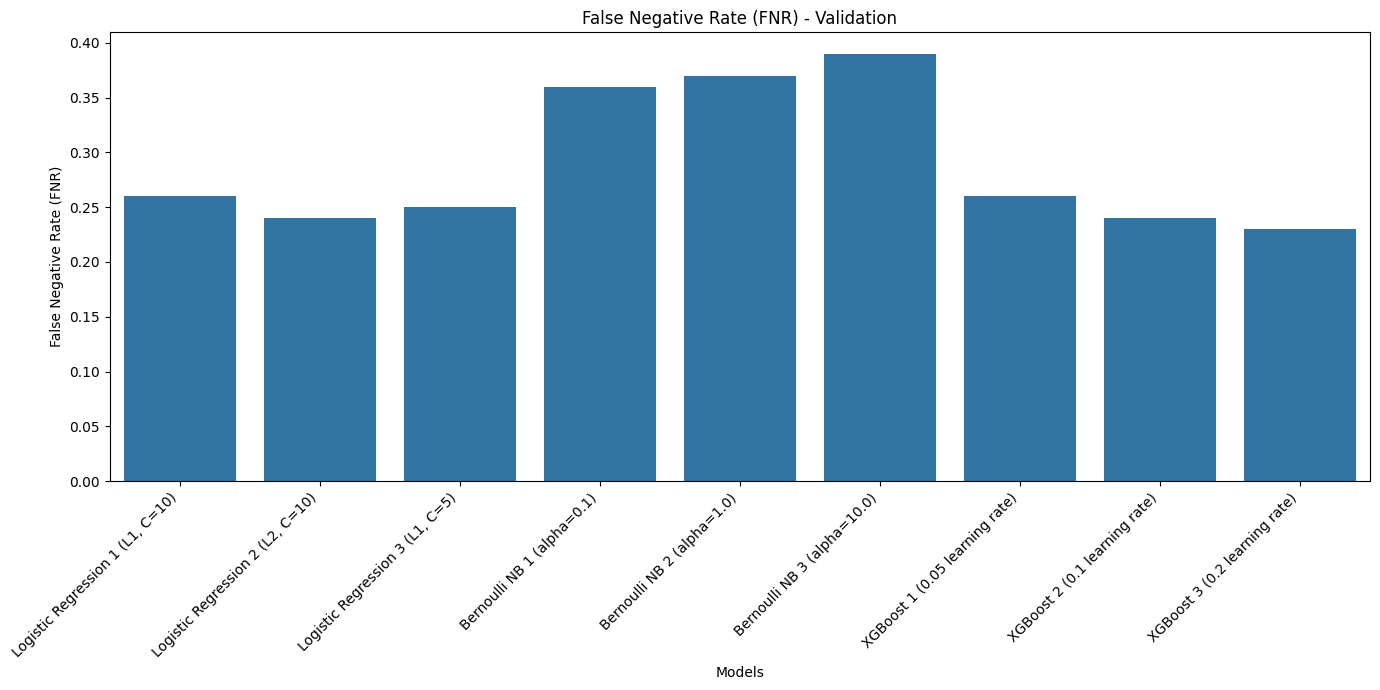

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Training and Validation Weighted Average Charts

# weight_avg_recalls_all for training and validation pulled from classification report in the same order as the model names above.
weight_avg_recalls_all_train = [1.00, 0.89, 0.99, 0.75, 0.71, 0.64, 0.80, 0.84, 0.89]
weight_avg_recalls_all_val = [0.74, 0.76, 0.75, 0.64, 0.63, 0.61, 0.74, 0.76, 0.77]

# Model names for all 9 
model_names = ["Logistic Regression 1 (L1, C=10)", "Logistic Regression 2 (L2, C=10)","Logistic Regression 3 (L1, C=5)", 
               "Bernoulli NB 1 (alpha=0.1)", "Bernoulli NB 2 (alpha=1.0)", "Bernoulli NB 3 (alpha=10.0)",
               "XGBoost 1 (0.05 learning rate)", "XGBoost 2 (0.1 learning rate)", "XGBoost 3 (0.2 learning rate)"]

# Calculate False Negative Rate (FNR)
false_negative_all_train = [1 - recall for recall in weight_avg_recalls_all_train]
weight_avg_recalls_all_val = [1 - recall for recall in weight_avg_recalls_all_val]

# Create DataFrames for easy plotting
data_train = pd.DataFrame({
    'Model': model_names,
    'Training FNR': false_negative_all_train
})

data_val = pd.DataFrame({
    'Model': model_names,
    'Validation FNR': weight_avg_recalls_all_val
})

# Bar plot for Training FNR
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Training FNR', data=data_train)
plt.xlabel("Models")
plt.ylabel("False Negative Rate (FNR)")
plt.xticks(rotation=45, ha="right")
plt.title("False Negative Rate (FNR) - Training")
plt.tight_layout()
plt.show()

# Bar plot for Validation FNR
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Validation FNR', data=data_val)
plt.xlabel("Models")
plt.ylabel("False Negative Rate (FNR)")
plt.xticks(rotation=45, ha="right")
plt.title("False Negative Rate (FNR) - Validation")
plt.tight_layout()
plt.show()

### Best Model

The best model is XGBoost 3 with 0.2 learning rate because it has the highest validation accuracy and highest validation average recall. Furthermore, it has a lower difference between training and validation accuracy, which means there is a lower chance of overfitting. 

In [49]:
# # Now evaulate the test set using the best model XGBoost Fastest

# # Get the last model from classifiers3
# last_model_name, last_model = list(classifiers3.items())[-1]

# # Predict on the test set using the last model (using test_x_combined)
# y_test_pred = last_model.predict(test_x_combined)

# # Calculate and print test accuracy
# test_accuracy = accuracy_score(test_y, y_test_pred)
# print("\n")
# print(f"For {last_model_name}:")
# print(f"  Test Accuracy: {test_accuracy}")

# # Compute and display test confusion matrix and classification report
# print("\nTest Set Metrics:")
# conf_matrix_test = confusion_matrix(test_y, y_test_pred)
# print(classification_report(test_y, y_test_pred, target_names=lbl_enc.classes_))

# sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Test Confusion Matrix for {last_model_name}')
# plt.show()

# # Optional: Compare Training, Validation, and Test scores.
# print(f"{last_model_name}:")
# print(f"  Training Accuracy: {training_accuracy_scores3[-1]}")
# print(f"  Validation Accuracy: {accuracy_scores3[-1]}")
# print(f"  Test Accuracy: {test_accuracy}")

# Week 10 Code Data Centric AI and Error Analysis

We have already done quite a bit of data centric AI techniques from earlier but here are three new ones we would like to test out. 

Note: I also commented out a lot of code previously so that it will run faster ( comment out all logistic, all naive baiyes, only the best XGBoost Model). If you want to see all the code and its output, please check previous weeks code and code output.

### Error Analysis on Training Dataset

Let's calculate the True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) which represents the performance of the XGBoost "XGB_Fastest" model on the training dataset.

**Class-wise Calculations**

**1. Anxiety**

* **TP:** 11675
* **TN:** 58686 (Sum of all other values excluding row and column of Anxiety)
* **FP:** 621 (Sum of column Anxiety excluding TP)
* **FN:** 1070 (Sum of row Anxiety excluding TP)

**2. Bipolar**

* **TP:** 11949
* **TN:** 58586 (Sum of all other values excluding row and column of Bipolar)
* **FP:** 383 (Sum of column Bipolar excluding TP)
* **FN:** 796 (Sum of row Bipolar excluding TP)

**3. Depression**

* **TP:** 8874
* **TN:** 61632 (Sum of all other values excluding row and column of Depression)
* **FP:** 1828 (Sum of column Depression excluding TP)
* **FN:** 3871 (Sum of row Depression excluding TP)

**4. Normal**

* **TP:** 11738
* **TN:** 58681 (Sum of all other values excluding row and column of Normal)
* **FP:** 1700 (Sum of column Normal excluding TP)
* **FN:** 1007 (Sum of row Normal excluding TP)

**5. Personality Disorder**

* **TP:** 12599
* **TN:** 57948 (Sum of all other values excluding row and column of Personality Disorder)
* **FP:** 571 (Sum of column Personality Disorder excluding TP)
* **FN:** 146 (Sum of row Personality Disorder excluding TP)

**6. Stress**

* **TP:** 12330
* **TN:** 58498 (Sum of all other values excluding row and column of Stress)
* **FP:** 1630 (Sum of column Stress excluding TP)
* **FN:** 415 (Sum of row Stress excluding TP)

**7. Suicidal**

* **TP:** 10457
* **TN:** 59247 (Sum of all other values excluding row and column of Suicidal)
* **FP:** 2859 (Sum of column Suicidal excluding TP)
* **FN:** 2288 (Sum of row Suicidal excluding TP)

**Analysis**

* **Very High Performance on Training Data:** The model performs exceptionally well on the training data, with very high TP values across all classes. This is expected, as models tend to fit training data very closely.
* **Potential Overfitting:** The significant difference in performance between the training and validation sets (from the previous confusion matrix) suggests potential overfitting. The model might be memorizing the training data rather than learning generalizable patterns.
* **Challenges with Depression and Suicidal:** Even on the training data, the model shows relatively higher FN for "Depression" and "Suicidal" compared to other classes. This indicates that these classes might be inherently more challenging to distinguish.
* **Class Imbalance:** Similar to the validation set, the training data likely also has a class imbalance, which can affect the model's ability to learn equally well for all classes.


In [50]:
# Calculate the error analysis for training dataset

# in array form the training confusion matrix for XGBoost Fastest
confusionmatrix1 = np.array([
    [11675, 99, 142, 232, 155, 377, 65],
    [161, 11949, 142, 120, 119, 198, 56],
    [195, 201, 8874, 412, 193, 244, 2626],
    [69, 21, 51, 11738, 44, 734, 88],
    [11, 0, 0, 124, 12599, 0, 11],
    [159, 33, 66, 114, 30, 12330, 13],
    [27, 29, 1427, 698, 30, 77, 10457]
])

classes = ["Anxiety", "Bipolar", "Depression", "Normal", "Personality Disorder", "Stress", "Suicidal"]

results = {}

for i, class_name in enumerate(classes):
    tp = confusionmatrix1[i, i]
    tn = np.sum(np.delete(np.delete(confusionmatrix1, i, axis=0), i, axis=1))
    fp = np.sum(confusionmatrix1[:, i]) - tp
    fn = np.sum(confusionmatrix1[i, :]) - tp

    results[class_name] = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

for class_name, metrics in results.items():
    print(f"Class: {class_name}")
    print(f"  TP: {metrics['TP']}")
    print(f"  TN: {metrics['TN']}")
    print(f"  FP: {metrics['FP']}")
    print(f"  FN: {metrics['FN']}")
    print("-" * 20)

Class: Anxiety
  TP: 11675
  TN: 75848
  FP: 622
  FN: 1070
--------------------
Class: Bipolar
  TP: 11949
  TN: 76087
  FP: 383
  FN: 796
--------------------
Class: Depression
  TP: 8874
  TN: 74642
  FP: 1828
  FN: 3871
--------------------
Class: Normal
  TP: 11738
  TN: 74770
  FP: 1700
  FN: 1007
--------------------
Class: Personality Disorder
  TP: 12599
  TN: 75899
  FP: 571
  FN: 146
--------------------
Class: Stress
  TP: 12330
  TN: 74840
  FP: 1630
  FN: 415
--------------------
Class: Suicidal
  TP: 10457
  TN: 73611
  FP: 2859
  FN: 2288
--------------------


### Error Analysis on Validation Dataset (XGBoost Fastest)

We decided to focus our error analysis on the validation confusion matrix on our best model XGBoost Fastest.

**Class-wise Calculations**

**1. Anxiety**

* **TP:** 298
* **TN:** 4308 (Sum of all other values excluding row and column of Anxiety)
* **FP:** 62 (Sum of column Anxiety excluding TP)
* **FN:** 63 (Sum of row Anxiety excluding TP)

**2. Bipolar**

* **TP:** 208
* **TN:** 4363 (Sum of all other values excluding row and column of Bipolar)
* **FP:** 59 (Sum of column Bipolar excluding TP)
* **FN:** 43 (Sum of row Bipolar excluding TP)

**3. Depression**

* **TP:** 985
* **TN:** 3948 (Sum of all other values excluding row and column of Depression)
* **FP:** 210 (Sum of column Depression excluding TP)
* **FN:** 536 (Sum of row Depression excluding TP)

**4. Normal**

* **TP:** 1482
* **TN:** 3451 (Sum of all other values excluding row and column of Normal)
* **FP:** 121 (Sum of column Normal excluding TP)
* **FN:** 180 (Sum of row Normal excluding TP)

**5. Personality Disorder**

* **TP:** 66
* **TN:** 4267 (Sum of all other values excluding row and column of Personality Disorder)
* **FP:** 81 (Sum of column Personality Disorder excluding TP)
* **FN:** 26 (Sum of row Personality Disorder excluding TP)

**6. Stress**

* **TP:** 188
* **TN:** 4145 (Sum of all other values excluding row and column of Stress)
* **FP:** 566 (Sum of column Stress excluding TP)
* **FN:** 36 (Sum of row Stress excluding TP)

**7. Suicidal**

* **TP:** 724
* **TN:** 4016 (Sum of all other values excluding row and column of Suicidal)
* **FP:** 418 (Sum of column Suicidal excluding TP)
* **FN:** 272 (Sum of row Suicidal excluding TP)

**Analysis**

* **High Performance for Normal and Depression:** The model performs exceptionally well in classifying "Normal" and "Depression" with high TP and relatively low FP and FN.
* **Challenges with Suicidal and Stress:** The model struggles with classifying "Suicidal" and "Stress," showing higher FP and FN rates. This suggests potential confusion between these classes and others.
* **Class Imbalance:** There seems to be an imbalance in the dataset. Some classes, like "Normal" and "Depression," have significantly more samples than others, which could affect the model's performance.

In [51]:
# Validation Error Analysis
# similar to above except for validation confusion matrix for xgboost
confusionmatrix2 = np.array([
    [298, 10, 7, 7, 15, 21, 3],
    [6, 208, 11, 4, 5, 15, 2],
    [18, 31, 985, 35, 25, 36, 391],
    [15, 2, 14, 1482, 9, 121, 19],
    [5, 8, 2, 6, 66, 4, 1],
    [14, 5, 3, 6, 6, 188, 2],
    [4, 3, 180, 68, 3, 14, 724]
])

classes = ["Anxiety", "Bipolar", "Depression", "Normal", "Personality Disorder", "Stress", "Suicidal"]

results = {}

for i, class_name in enumerate(classes):
    tp1 = confusionmatrix2[i, i]
    tn1 = np.sum(np.delete(np.delete(confusionmatrix2, i, axis=0), i, axis=1))
    fp1 = np.sum(confusionmatrix2[:, i]) - tp1
    fn1 = np.sum(confusionmatrix2[i, :]) - tp1

    results[class_name] = {
        "TP": tp1,
        "TN": tn1,
        "FP": fp1,
        "FN": fn1
    }

for class_name, metrics in results.items():
    print(f"Class: {class_name}")
    print(f"  TP: {metrics['TP']}")
    print(f"  TN: {metrics['TN']}")
    print(f"  FP: {metrics['FP']}")
    print(f"  FN: {metrics['FN']}")
    print("-" * 20)

Class: Anxiety
  TP: 298
  TN: 4684
  FP: 62
  FN: 63
--------------------
Class: Bipolar
  TP: 208
  TN: 4797
  FP: 59
  FN: 43
--------------------
Class: Depression
  TP: 985
  TN: 3369
  FP: 217
  FN: 536
--------------------
Class: Normal
  TP: 1482
  TN: 3319
  FP: 126
  FN: 180
--------------------
Class: Personality Disorder
  TP: 66
  TN: 4952
  FP: 63
  FN: 26
--------------------
Class: Stress
  TP: 188
  TN: 4672
  FP: 211
  FN: 36
--------------------
Class: Suicidal
  TP: 724
  TN: 3693
  FP: 418
  FN: 272
--------------------


# Data-Centric AI Techniques for Sentiment Analysis in Mental Health  

In our approach to **sentiment analysis for mental health**, we focus on improving the **quality and structure of the dataset** rather than modifying the model itself. Below are three **new Data-Centric AI techniques** we will implement:  

## 1. Adding Statement Length as a Feature  
### **Why It Helps**  
- Longer statements may **contain more context** and emotional depth, which can improve sentiment classification.  
- Shorter statements might be more ambiguous or lack sufficient emotional cues.  
- By including **statement length** as a numerical feature, the model can learn patterns between text length and sentiment, improving overall performance.  

## 2. Using SMOTE Instead of Random Oversampling  
### **Why It Helps**  
- Instead of simple duplication (random oversampling), **SMOTE (Synthetic Minority Over-sampling Technique)** **creates synthetic examples** of the minority class.   This may help with predicting stress and suicidal, which it has a hard time doing. 
- This technique **reduces bias toward majority sentiment classes**, making the model more balanced.  
- For mental health sentiment analysis, where **negative and neutral sentiments** might be underrepresented, **SMOTE ensures these classes have sufficient data for learning**.  

## 3. Removing Outliers from the Data  
### **Why It Helps**  
- **Outliers in sentiment data** could be caused by noisy, irrelevant, or misclassified text (e.g., sarcastic or off-topic responses).  
- Removing outliers **improves the overall consistency of the dataset**, reducing potential confusion for the model especially since the outliers tended to be depression and normal, which have many cases already and create a more balanced dataset. 
- This is especially important in **mental health sentiment analysis**, where extreme or anomalous responses might not align with general sentiment patterns.  

### **Conclusion**  
By focusing on **data quality enhancements**, these techniques aim to **make sentiment predictions more accurate and fair**, ensuring that the model effectively captures mental health-related sentiments in a meaningful way.  


### 1. Removing Outliers from the Data
From the outliers plot way back in the beginning of this notebook, we calculated the outliers for upper and lower bound. We will use those upper and lower bounds and remove them from df_unique.  

In [52]:
df_ai = df_unique[(df_unique['statement_len'] >= lower_bound) & (df_unique['statement_len'] <= upper_bound)]

### 2. Add Statement Length 
When we created our X and y, our training and test data, we dropped the statement length column since they seemed similar to number of characters and number of sentences. We will add it back in now, run the train-test split again and tf-idf. 


In [53]:
X1 = df_ai[['tokens_stemmed', 'num_of_characters', 'num_of_sentences','statement_len']]
y1 = df_ai['status']

In [54]:
# label encode our categorical variables for y 
lbl_enc = LabelEncoder()
y1 = lbl_enc.fit_transform(y1.values)

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%) sets
train_x1, temp_x1, train_y1, temp_y1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split the temporary set into validation (50%) and test (50%) sets
val_x1, test_x1, val_y1, test_y1 = train_test_split(temp_x1, temp_y1, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_x1)}")
print(f"Validation set size: {len(val_x1)}")
print(f"Test set size: {len(test_x1)}")

Training set size: 38188
Validation set size: 4773
Test set size: 4774


In [56]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens_stemmed' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_train_tfidf1 = vectorizer.fit_transform(train_x1['tokens_stemmed'])
X_val_tfidf1 = vectorizer.transform(val_x1['tokens_stemmed'])
test_x_tfidf1 = vectorizer.transform(test_x1['tokens_stemmed'])

# 3. Numerical Feature Extraction
X_train_num1 = csr_matrix(train_x1[['num_of_characters', 'num_of_sentences','statement_len']].values)
X_val_num1 = csr_matrix(val_x1[['num_of_characters', 'num_of_sentences','statement_len']].values)
test_x_num1 = csr_matrix(test_x1[['num_of_characters', 'num_of_sentences','statement_len']].values)

# 4. Combine Features
X_train_combined1 = hstack([X_train_tfidf1, X_train_num1])
X_val_combined1 = hstack([X_val_tfidf1, X_val_num1])
test_x_combined1 = hstack([test_x_tfidf1, test_x_num1])

# Print number of feature words
print('Number of feature words:', len(vectorizer.get_feature_names_out()))


Number of feature words: 50000


### 3. Now Use SMOTE instead of Random Oversampling


In [57]:
# View the mapping of categorical labels to numeric labels
print(lbl_enc.classes_)
 # this means anxiety-0, bipolar-1 etc. depression-2, normal-3, personality disorder-4, stress-5, suicidal-6

['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']


In [58]:
# Check the distribution of your target labels for SMOTE
import pandas as pd

df = pd.DataFrame({'status': y1})  # Assuming y1 is your label data
print(df['status'].value_counts())


status
3    16039
2    13440
6     9671
0     3328
1     2229
5     2224
4      804
Name: count, dtype: int64


In [59]:
# Free up memory
import gc
gc.collect()

8825

In [60]:
# Use SMOTE to oversample the training data 
from imblearn.over_sampling import SMOTE
# I would like to add 3000 samples to all classes except 3,2 and 6. I would do more but computationally intensive
sampling_strategy = {
    0: 6328,  # Class 0: 3328 + 3000 = 6328
    1: 5229,  # Class 1: 2229 + 3000 = 5229
    4: 3804,  # Class 4: 804 + 3000 = 3804
    5: 5224   # Class 5: 2224 + 3000 = 5224
}

smote = SMOTE(sampling_strategy = sampling_strategy, random_state=0)
X_train_resampled1, y_train_resampled1 = smote.fit_resample(X_train_combined1,train_y1)



For XGB_Fastest:
  Training Accuracy: 0.8838867582724662
  Validation Accuracy: 0.7986591242405195

Training Set Metrics:
                      precision    recall  f1-score   support

             Anxiety       0.95      0.93      0.94      6328
             Bipolar       0.97      0.93      0.95      5229
          Depression       0.81      0.80      0.80     10741
              Normal       0.90      0.97      0.93     12855
Personality disorder       0.98      0.96      0.97      3804
              Stress       0.92      0.92      0.92      5224
            Suicidal       0.78      0.73      0.75      7708

            accuracy                           0.88     51889
           macro avg       0.90      0.89      0.90     51889
        weighted avg       0.88      0.88      0.88     51889



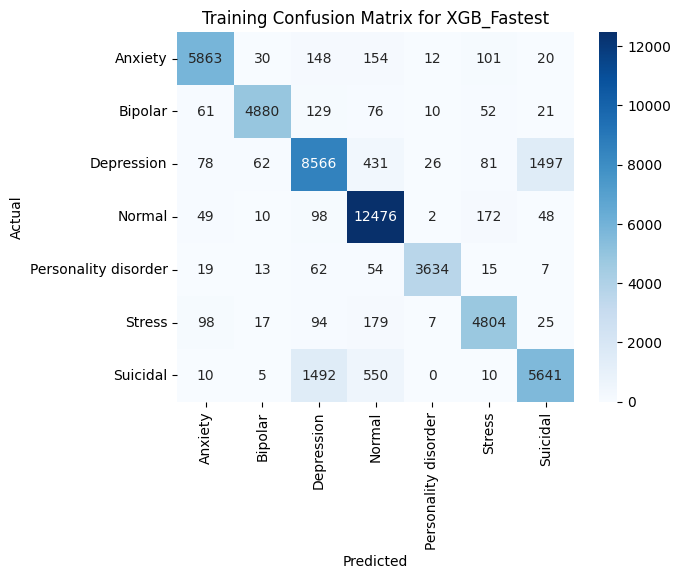


Validation Set Metrics:
                      precision    recall  f1-score   support

             Anxiety       0.82      0.80      0.81       335
             Bipolar       0.83      0.76      0.79       233
          Depression       0.76      0.76      0.76      1307
              Normal       0.88      0.94      0.91      1624
Personality disorder       0.76      0.55      0.64        87
              Stress       0.63      0.65      0.64       231
            Suicidal       0.73      0.68      0.70       956

            accuracy                           0.80      4773
           macro avg       0.77      0.73      0.75      4773
        weighted avg       0.80      0.80      0.80      4773



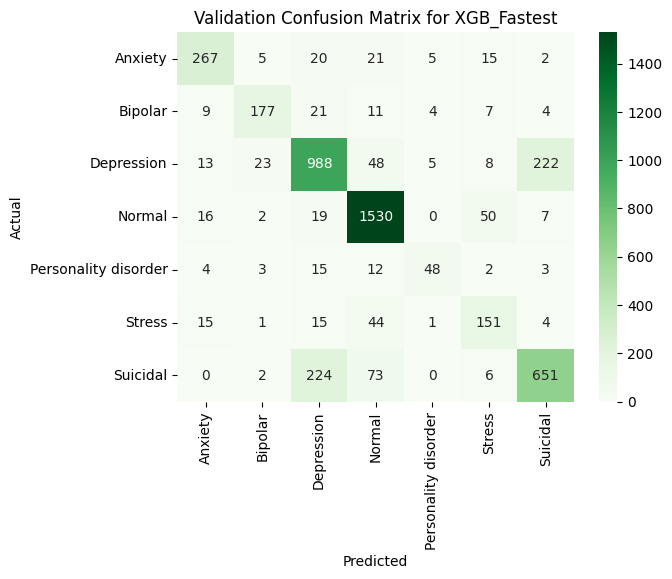


Summary of Accuracy Scores:
XGB_Fastest:
  Training Accuracy: 0.8838867582724662
  Validation Accuracy: 0.7986591242405195
XGB_Fastest:
  Training Accuracy: 0.8838867582724662
  Validation Accuracy: 0.7986591242405195
  Difference: 0.08522763403194666
    Model is likely a good fit


In [61]:
### Now Train Using these new techniques using XGBoost
# Now run the same training code from week 6 for week 8
# create an empty list to store accuracy scores
accuracy_scores4 = []
training_accuracy_scores4 = []

# create for loop to train, predict, and evaluate each model as well as the training, validation accuracy, confusion matrix and classification report
for name, clf in classifiers3.items():
    clf.fit(X_train_resampled1, y_train_resampled1)

    # Calculate and store training accuracy
    y_train_pred = clf.predict(X_train_resampled1)
    training_accuracy = accuracy_score(y_train_resampled1, y_train_pred)
    training_accuracy_scores4.append(training_accuracy)

    # Calculate and store validation accuracy
    y_pred = clf.predict(X_val_combined1)
    accuracy = accuracy_score(val_y1, y_pred)
    accuracy_scores4.append(accuracy)

    print("\n")
    print(f"For {name}:")
    print(f"  Training Accuracy: {training_accuracy}")
    print(f"  Validation Accuracy: {accuracy}")

    # Compute and display training confusion matrix and classification report
    print("\nTraining Set Metrics:")
    conf_matrix_train = confusion_matrix(y_train_resampled1, y_train_pred)
    print(classification_report(y_train_resampled1, y_train_pred, target_names=lbl_enc.classes_))

    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.show()

    # Compute and display validation confusion matrix and classification report
    print("\nValidation Set Metrics:")
    conf_matrix_val = confusion_matrix(val_y1, y_pred)
    print(classification_report(val_y1, y_pred, target_names=lbl_enc.classes_))

    sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Validation Confusion Matrix for {name}')
    plt.show()

# Print a summary of accuracy scores at the end
print("\nSummary of Accuracy Scores:")
for i, (name, _) in enumerate(classifiers3.items()):
    print(f"{name}:")
    print(f"  Training Accuracy: {training_accuracy_scores4[i]}")
    print(f"  Validation Accuracy: {accuracy_scores4[i]}")

# (Optional) You can further analyze or compare accuracy scores here for overfitting For example:
for i, (name, _) in enumerate(classifiers3.items()):
    print(f"{name}:")
    print(f"  Training Accuracy: {training_accuracy_scores4[i]}")
    print(f"  Validation Accuracy: {accuracy_scores4[i]}")
    difference = training_accuracy_scores4[i] - accuracy_scores4[i]
    print(f"  Difference: {difference}")  # This would display the difference between the training and validation accuracy
    if difference > 0.1: # difference is greater than 0.1
        print("    Possible Overfitting")
    elif difference < 0.02: # difference is less than 0.02
        print("    Possible Underfitting")
    else:
        print("    Model is likely a good fit")

### Which Model is better?

The XGBoost model where we did the three new data centric ai techniques performed better than the XGBoost Model we selected last week. This may be because we produced a more balanced dataset by looking at the imbalance and using SMOTE to balance it better as well as removing outliers, which also created a more balanced dataset since it removed a lot of normal and depression ( 2 classes with lots of samples) but not the other classes. It also had a lot less overfitting because the gap between training and validation accuracy was not as big. It also had a higher validation accuracy. It also has higher average recall score.

| Model | Training Accuracy | Validation Accuracy | Validation Recall |
|---|---|---|---|
| XGBoost | 0.89 | 0.77 | 0.77|
| XGBoost SMOTE | 0.88 | 0.80 | 0.80 |



For XGB_Fastest:
  Test Accuracy: 0.7855048177628823

Test Set Metrics:
                      precision    recall  f1-score   support

             Anxiety       0.81      0.82      0.82       302
             Bipolar       0.90      0.77      0.83       224
          Depression       0.74      0.72      0.73      1392
              Normal       0.87      0.95      0.91      1560
Personality disorder       0.72      0.58      0.64        83
              Stress       0.65      0.63      0.64       206
            Suicidal       0.70      0.67      0.68      1007

            accuracy                           0.79      4774
           macro avg       0.77      0.73      0.75      4774
        weighted avg       0.78      0.79      0.78      4774



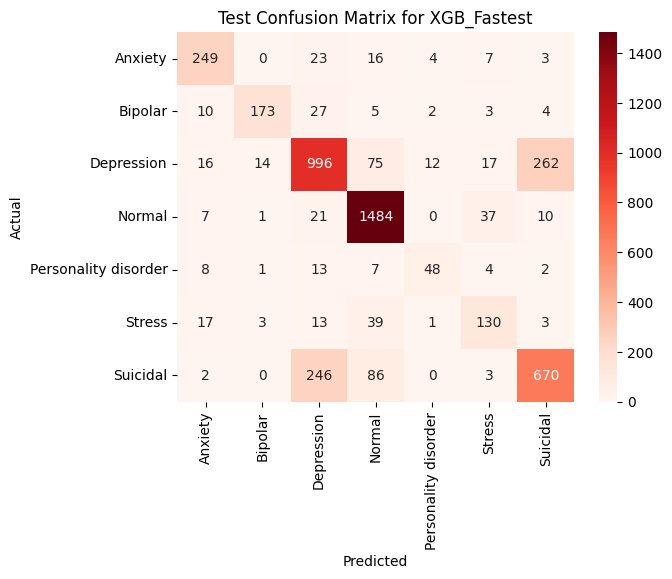

XGB_Fastest:
  Training Accuracy: 0.8838867582724662
  Validation Accuracy: 0.7986591242405195
  Test Accuracy: 0.7855048177628823


In [62]:
# Now evaulate the test set using the best model and the best training and test dataset. 

# Get the last model from classifiers3
last_model_name, last_model = list(classifiers3.items())[-1]

# Predict on the test set using the last model (using test_x_combined)
y_test_pred = last_model.predict(test_x_combined1)

# Calculate and print test accuracy
test_accuracy = accuracy_score(test_y1, y_test_pred)
print("\n")
print(f"For {last_model_name}:")
print(f"  Test Accuracy: {test_accuracy}")

# Compute and display test confusion matrix and classification report
print("\nTest Set Metrics:")
conf_matrix_test = confusion_matrix(test_y1, y_test_pred)
print(classification_report(test_y1, y_test_pred, target_names=lbl_enc.classes_))

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=lbl_enc.classes_, yticklabels=lbl_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Test Confusion Matrix for {last_model_name}')
plt.show()

# Optional: Compare Training, Validation, and Test scores.
print(f"{last_model_name}:")
print(f"  Training Accuracy: {training_accuracy_scores4[-1]}")
print(f"  Validation Accuracy: {accuracy_scores4[-1]}")
print(f"  Test Accuracy: {test_accuracy}")

In [63]:
### Error Analysis for the Model on the Training Set
# confusion matrix as array for training set
confusionmatrix4 = np.array([
    [5863, 30, 148, 154, 12, 101, 20],
    [61, 4880, 129, 76, 10, 52, 21],
    [78, 62, 8566, 431, 26, 81, 1497],
    [49, 10, 98, 12476, 2, 172, 48],
    [19, 13, 62, 54, 3634, 15, 7],
    [98, 17, 94, 179, 7, 4804, 25],
    [10, 5, 1492, 550, 0, 10, 5641]
])

classes = ["Anxiety", "Bipolar", "Depression", "Normal", "Personality Disorder", "Stress", "Suicidal"]

results = {}

for i, class_name in enumerate(classes):
    tp = confusionmatrix4[i, i]
    tn = np.sum(np.delete(np.delete(confusionmatrix4, i, axis=0), i, axis=1))
    fp = np.sum(confusionmatrix4[:, i]) - tp
    fn = np.sum(confusionmatrix4[i, :]) - tp

    results[class_name] = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

for class_name, metrics in results.items():
    print(f"Class: {class_name}")
    print(f"  TP: {metrics['TP']}")
    print(f"  TN: {metrics['TN']}")
    print(f"  FP: {metrics['FP']}")
    print(f"  FN: {metrics['FN']}")
    print("-" * 20)


Class: Anxiety
  TP: 5863
  TN: 45246
  FP: 315
  FN: 465
--------------------
Class: Bipolar
  TP: 4880
  TN: 46523
  FP: 137
  FN: 349
--------------------
Class: Depression
  TP: 8566
  TN: 39125
  FP: 2023
  FN: 2175
--------------------
Class: Normal
  TP: 12476
  TN: 37590
  FP: 1444
  FN: 379
--------------------
Class: Personality Disorder
  TP: 3634
  TN: 48028
  FP: 57
  FN: 170
--------------------
Class: Stress
  TP: 4804
  TN: 46234
  FP: 431
  FN: 420
--------------------
Class: Suicidal
  TP: 5641
  TN: 42563
  FP: 1618
  FN: 2067
--------------------


In [64]:
# False Positive and False Negative Rate Calculation Weighted Average Recall
fnr_train = 1-0.88 # 1- recall
fpr_train = 1-0.88 # 1- precision

# Print the results
print("Weighted Average False Negative Rate (FNR):", fnr_train)
print("Estimated Weighted Average False Positive Rate (FPR):", fpr_train)

Weighted Average False Negative Rate (FNR): 0.12
Estimated Weighted Average False Positive Rate (FPR): 0.12


In [65]:
### Error Analysis for the Model on Validation Set

#confusion matrix as array for validation set
confusionmatrix3 = np.array([
    [267, 5, 20, 21, 5, 15, 2],
    [9, 177, 21, 11, 4, 7, 4],
    [13, 23, 988, 48, 5, 8, 222],
    [16, 2, 19, 1530, 0, 50, 7],
    [4, 3, 15, 12, 48, 2, 3],
    [15, 1, 15, 44, 1, 151, 4],
    [0, 2, 224, 73, 0, 6, 651]
])

classes = ["Anxiety", "Bipolar", "Depression", "Normal", "Personality Disorder", "Stress", "Suicidal"]

results = {}

for i, class_name in enumerate(classes):
    tp = confusionmatrix3[i, i]
    tn = np.sum(np.delete(np.delete(confusionmatrix3, i, axis=0), i, axis=1))
    fp = np.sum(confusionmatrix3[:, i]) - tp
    fn = np.sum(confusionmatrix3[i, :]) - tp

    results[class_name] = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

for class_name, metrics in results.items():
    print(f"Class: {class_name}")
    print(f"  TP: {metrics['TP']}")
    print(f"  TN: {metrics['TN']}")
    print(f"  FP: {metrics['FP']}")
    print(f"  FN: {metrics['FN']}")
    print("-" * 20)


Class: Anxiety
  TP: 267
  TN: 4381
  FP: 57
  FN: 68
--------------------
Class: Bipolar
  TP: 177
  TN: 4504
  FP: 36
  FN: 56
--------------------
Class: Depression
  TP: 988
  TN: 3152
  FP: 314
  FN: 319
--------------------
Class: Normal
  TP: 1530
  TN: 2940
  FP: 209
  FN: 94
--------------------
Class: Personality Disorder
  TP: 48
  TN: 4671
  FP: 15
  FN: 39
--------------------
Class: Stress
  TP: 151
  TN: 4454
  FP: 88
  FN: 80
--------------------
Class: Suicidal
  TP: 651
  TN: 3575
  FP: 242
  FN: 305
--------------------


In [66]:
# False Positive and False Negative Rate Calculation Weighted Average Recall Validation
fnr_val = 1-0.80 # 1- recall
fpr_val = 1-0.80 # 1- precision

# Print the results
print("Weighted Average False Negative Rate (FNR):", fnr_val)
print("Estimated Weighted Average False Positive Rate (FPR):", fpr_val)

Weighted Average False Negative Rate (FNR): 0.19999999999999996
Estimated Weighted Average False Positive Rate (FPR): 0.19999999999999996


In [67]:
### Error Analysis on the Test Set
# confusion matrix for test set as array
confusionmatrix5 = np.array([
    [249, 0, 23, 16, 4, 7, 3],
    [10, 173, 27, 5, 2, 3, 4],
    [16, 14, 996, 75, 12, 17, 262],
    [7, 1, 21, 1484, 0, 37, 10],
    [8, 1, 13, 7, 48, 4, 2],
    [17, 3, 13, 39, 1, 130, 3],
    [2, 0, 246, 86, 0, 3, 670]
])

classes = ["Anxiety", "Bipolar", "Depression", "Normal", "Personality Disorder", "Stress", "Suicidal"]

results = {}

for i, class_name in enumerate(classes):
    tp = confusionmatrix5[i, i]
    tn = np.sum(np.delete(np.delete(confusionmatrix5, i, axis=0), i, axis=1))
    fp = np.sum(confusionmatrix5[:, i]) - tp
    fn = np.sum(confusionmatrix5[i, :]) - tp

    results[class_name] = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

for class_name, metrics in results.items():
    print(f"Class: {class_name}")
    print(f"  TP: {metrics['TP']}")
    print(f"  TN: {metrics['TN']}")
    print(f"  FP: {metrics['FP']}")
    print(f"  FN: {metrics['FN']}")
    print("-" * 20)

Class: Anxiety
  TP: 249
  TN: 4412
  FP: 60
  FN: 53
--------------------
Class: Bipolar
  TP: 173
  TN: 4531
  FP: 19
  FN: 51
--------------------
Class: Depression
  TP: 996
  TN: 3039
  FP: 343
  FN: 396
--------------------
Class: Normal
  TP: 1484
  TN: 2986
  FP: 228
  FN: 76
--------------------
Class: Personality Disorder
  TP: 48
  TN: 4672
  FP: 19
  FN: 35
--------------------
Class: Stress
  TP: 130
  TN: 4497
  FP: 71
  FN: 76
--------------------
Class: Suicidal
  TP: 670
  TN: 3483
  FP: 284
  FN: 337
--------------------


In [68]:
# False Positive and False Negative Rate Calculation Weighted Average Recall Test
fnr_ts = 1-0.79 # 1- recall
fpr_ts = 1-0.78 # 1- precision

# Print the results
print("Weighted Average False Negative Rate (FNR):", fnr_ts)
print("Estimated Weighted Average False Positive Rate (FPR):", fpr_ts)

Weighted Average False Negative Rate (FNR): 0.20999999999999996
Estimated Weighted Average False Positive Rate (FPR): 0.21999999999999997


Overall, this model has the lowest false negative rate of 0.21, also making this the best model. 

### Week 11 Code

#### Feature Importance

1.  **Feature Extraction:** Uses `TfidfVectorizer` for text data (with n-grams) and combines it with numerical features.
2.  **Oversampling:** Applies SMOTE to address class imbalance.
3.  **Model Definition:** We use a dictionary `classifiers3` containing the models to be trained, including 'XGB_Fastest' as an XGBoost classifier, the best model. 
4.  **Feature Importance Extraction for 'XGB_Fastest':** After the training loop, it specifically targets the model named 'XGB_Fastest'. If found, it extracts the `feature_importances_`, maps them to the corresponding feature names (from TF-IDF and numerical features), sorts them, prints the top 20 most important features, and visualizes them using a horizontal bar chart.


#### XGBoost Feature Importance

XGBoost provides a way to estimate the importance of each feature in the trained model. This helps in understanding which features were most influential in making predictions.

**What it Represents:**

* **Relative Contribution:** Feature importance scores indicate the relative contribution of each feature to the model's predictive power. A higher score generally means the feature was more useful.
* **Overall Usefulness:** It reflects how much a feature contributed to improving the model's accuracy across all the boosted trees.
* **Not Directional:** Importantly, feature importance in XGBoost **does not** tell you the direction of the relationship between a feature and the target variable (i.e., whether higher values increase or decrease the prediction).


Top 20 most important features for XGB_Fastest:
bipolar: 0.0239
avpd: 0.0214
with avpd: 0.0186
episod: 0.0126
num_of_characters: 0.0114
im: 0.0105
have avpd: 0.0105
manic: 0.0091
restless: 0.0085
depress: 0.0083
avoid: 0.0075
worri: 0.0075
social: 0.0074
stress: 0.0072
blood: 0.0072
health anxieti: 0.0067
med: 0.0065
lamict: 0.0056
not: 0.0052
stress and: 0.0051


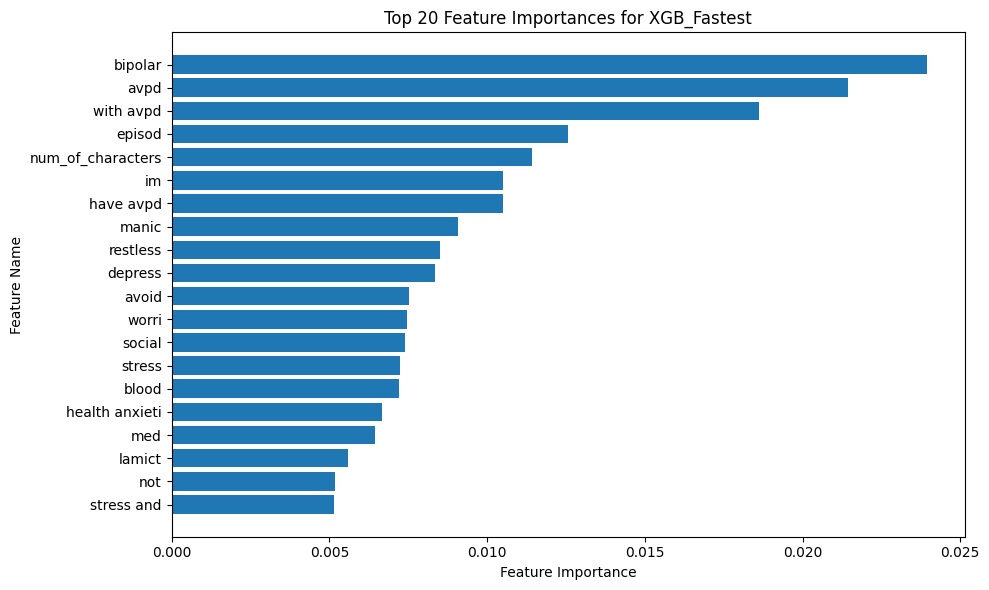

In [69]:

# Assuming classifiers3 is populated and the model name is 'XGB_Fastest'
last_model_name, last_model = list(classifiers3.items())[-1]

# Extract and Display Feature Importances for the model named 'XGB_Fastest'
if last_model_name == 'XGB_Fastest':
    # Get feature importance scores
    importances = last_model.feature_importances_

    # Get feature names for TF-IDF features
    tfidf_feature_names = vectorizer.get_feature_names_out()

    # Get feature names for numerical features
    numerical_feature_names = ['num_of_characters', 'num_of_sentences', 'statement_len']

    # Combine feature names
    all_feature_names = list(tfidf_feature_names) + numerical_feature_names

    # Create a dictionary of feature names and their importance scores
    feature_importance_dict = dict(zip(all_feature_names, importances))

    # Sort feature importances in descending order
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

    # Print the top N important features
    top_n = 20  # You can adjust this number
    print(f"\nTop {top_n} most important features for {last_model_name}:")
    for feature, importance in sorted_feature_importance[:top_n]:
        print(f"{feature}: {importance:.4f}")

    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    top_importances = dict(sorted_feature_importance[:top_n])
    plt.barh(list(top_importances.keys()), list(top_importances.values()))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Top {top_n} Feature Importances for {last_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
elif hasattr(last_model, 'feature_importances_'):
    print(f"\nExtracting feature importances for the last model: {last_model_name}")
    importances = last_model.feature_importances_
    # Handle feature names based on how the model was trained
    if 'XGB' in last_model_name: # Assuming TF-IDF and numerical features if name contains 'XGB'
        tfidf_feature_names = vectorizer.get_feature_names_out()
        numerical_feature_names = ['num_of_characters', 'num_of_sentences', 'statement_len']
        all_feature_names = list(tfidf_feature_names) + numerical_feature_names
    else:
        # If it's another type of model, you might need a different way to get feature names
        all_feature_names = [f"feature_{i}" for i in range(len(importances))] # Generic names

    feature_importance_dict = dict(zip(all_feature_names, importances))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

    top_n = 20
    print(f"Top {top_n} most important features for {last_model_name}:")
    for feature, importance in sorted_feature_importance[:top_n]:
        print(f"{feature}: {importance:.4f}")

    # Visualization (adapt as needed)
    plt.figure(figsize=(10, 6))
    top_importances = dict(sorted_feature_importance[:top_n])
    plt.barh(list(top_importances.keys()), list(top_importances.values()))
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Top {top_n} Feature Importances for {last_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\nModel '{last_model_name}' does not have a 'feature_importances_' attribute.")

## Interpretation of XGBoost Feature Importance Plot

This horizontal bar plot displays the top 20 most important features as determined by the XGBoost model named "XGB_Fastest". The feature importance is represented by the length of the horizontal bars.

**Key Components:**

* **Y-axis (Feature Name):** Lists the top 20 features that the XGBoost model found to be most influential in making predictions. These features are listed vertically.
* **X-axis (Feature Importance):** Represents the magnitude of each feature's importance. The values increase from left to right. Longer bars indicate higher feature importance.
* **Bars:** Each horizontal bar corresponds to a specific feature. The length of the bar visually represents its importance score.

**Interpretation of the Top Features:**

Based on the plot and the provided numerical values, the top 5 most important features for the "XGB_Fastest" model are:

1.  **bipolar (0.0239):** This is the most important feature by a significant margin. Its presence or characteristics strongly influence the model's predictions.
2.  **avpd (0.0214):** This is the second most important feature, still having a substantial impact on the model's output. "avpd" likely stands for Avoidant Personality Disorder or a related term.
3.  **with avpd (0.0186):** This feature, indicating the presence of "avpd" in some context (likely a phrase or combination with other words), is the third most important.
4.  **episod (0.0126):** This feature, likely related to "episode" (potentially referring to mood episodes or events), is the fourth most important.
5.  **num\_of\_characters (0.0114):** The number of characters in the input text is the fifth most important feature, suggesting that the length of the text provides some predictive signal.

**General Observations:**

* **Dominant Features:** The features "bipolar," "avpd," and "with avpd" appear to be considerably more important than the other features in the top 20. This suggests the model heavily relies on these terms for its predictions.
* **Mental Health Related Terms:** Many of the top features (e.g., bipolar, avpd, episod, manic, depress, avoid, worri, health anxieti, lamict) are directly related to mental health conditions or symptoms. This is expected if the model is designed to classify or analyze text related to mental health.
* **Linguistic Features:** Features like "num\_of\_characters," "im," "have avpd," "not," and "stress and" indicate that the model also considers the presence of specific words, phrases, and the overall length of the text.
* **Relative Importance:** The plot clearly shows the relative importance of each feature compared to the others in the top 20. The differences in bar lengths visually represent the differences in their importance scores.

**Implications:**

Understanding feature importance can be valuable for:

* **Model Interpretation:** Identifying which aspects of the text are most influential in the model's decision-making process.
* **Feature Selection:** Potentially reducing the number of features used in the model if some are consistently low in importance (though caution is needed as seemingly unimportant features can have interactions).
* **Domain Understanding:** Gaining insights into the language and patterns associated with the different categories the model is predicting.
* **Bias Detection (Indirectly):** While this plot alone doesn't directly quantify bias, if you know that certain less important features are strongly associated with specific demographic groups, it might suggest the model isn't relying on those potentially sensitive features as much. However, a dedicated bias analysis using techniques like SHAP would be more direct.

In summary, the "bipolar," "avpd," and "with avpd" terms are the most critical features for the "XGB_Fastest" model according to this analysis, followed by "episod" and the length of the text. The plot provides a clear visual ranking of the top 20 features that contribute most to the model's predictions.

### Selection of Five Random Predictions and their SHAP Values


In [70]:

# use our test dataset 
num_samples = test_x_combined1.shape[0]
random_indices = random.sample(range(num_samples), 5)

selected_instances = test_x_combined1[random_indices]
true_labels = test_y1[random_indices]
predictions = last_model.predict(selected_instances)

print("Selected Instance Indices:", random_indices)
print("True Labels:", true_labels)
print("Predictions:", predictions)

Selected Instance Indices: [2956, 3886, 3117, 1411, 2621]
True Labels: [3 6 0 2 2]
Predictions: [3 6 0 2 2]


## SHAP for Mental Health Sentiment Analysis: Concise Explanation

**What is SHAP?**

SHAP (SHapley Additive exPlanations) is a model-agnostic framework explaining individual machine learning predictions by quantifying each feature's contribution relative to the average prediction. It uses Shapley values from game theory.

**Why is it Useful for Mental Health Sentiment Analysis?**

SHAP is particularly valuable for understanding sentiment in mental health text because it helps:

* **Pinpoint Key Linguistic Indicators:** Identify specific words and phrases (e.g., "hopeless," "support") driving positive or negative sentiment predictions related to mental well-being.
* **Explain Individual Predictions:** Understand *why* a model flags a particular text as indicative of distress or positive coping mechanisms, increasing trust and interpretability in a sensitive domain.
* **Uncover Potential Biases:** Detect if the model unfairly associates certain terms or demographics with specific sentiments.
* **Inform Linguistic Insights:** Identify general linguistic patterns and key indicators of different mental states across a dataset, potentially informing interventions and resource development.
* **Validate Model Reasoning:** Ensure the model's decisions align with clinical understanding of mental health language.

In essence, SHAP provides crucial transparency into how sentiment analysis models process mental health-related text, leading to more reliable, trustworthy, and potentially clinically relevant applications.

In [71]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


Shape of shap_values: (5, 50003, 7)
Predicted classes: [3 6 0 2 2]
Number of classes (from lbl_enc): 7

Instance 0: Predicted Class Index = 3

Instance 1: Predicted Class Index = 6

Instance 2: Predicted Class Index = 0

Instance 3: Predicted Class Index = 2

Instance 4: Predicted Class Index = 2

--- Explanations using SHAP ---

Instance 2956 (True Label: Normal, Prediction: Normal):
Top contributing features:
- num_of_characters: 0.7318
- wake up: -0.3670
- statement_len: 0.2329
- num_of_sentences: 0.1755
- you: 0.1547
- feel: 0.1489
- and: 0.1452
- just: 0.1160
- am: 0.1132
- do: 0.1100


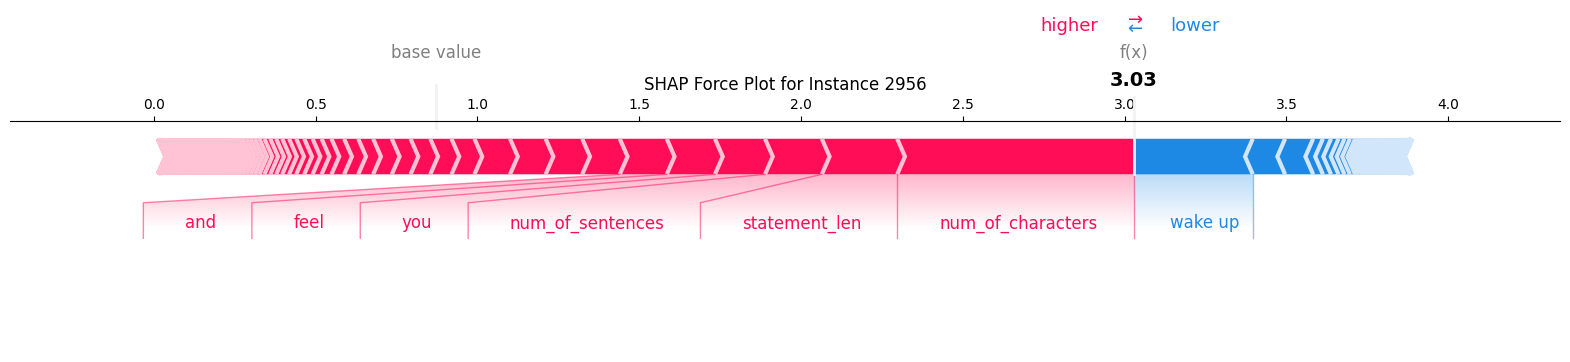


Instance 3886 (True Label: Suicidal, Prediction: Suicidal):
Top contributing features:
- damn: 0.7196
- im: 0.2764
- myself: 0.2421
- not: -0.2316
- am: -0.1637
- hate: 0.1441
- suicid: -0.1325
- would: 0.1018
- num_of_characters: 0.0975
- want: -0.0878


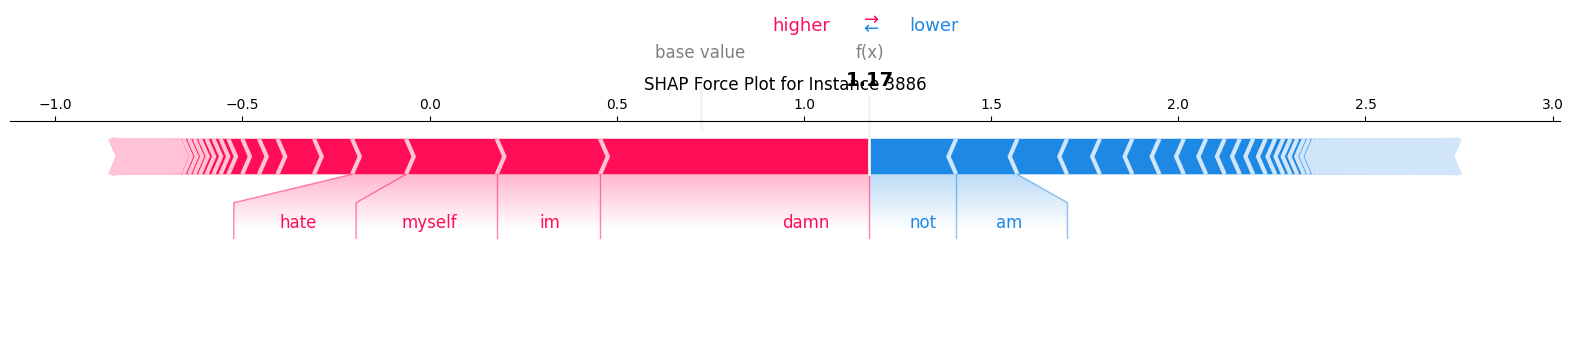


Instance 3117 (True Label: Anxiety, Prediction: Anxiety):
Top contributing features:
- restless: 5.0172
- anxieti: -0.2999
- to: 0.2330
- do: -0.2237
- worri: -0.1735
- statement_len: 0.1461
- anxiou: -0.1405
- num_of_characters: 0.1293
- nervou: -0.0740
- am: 0.0547


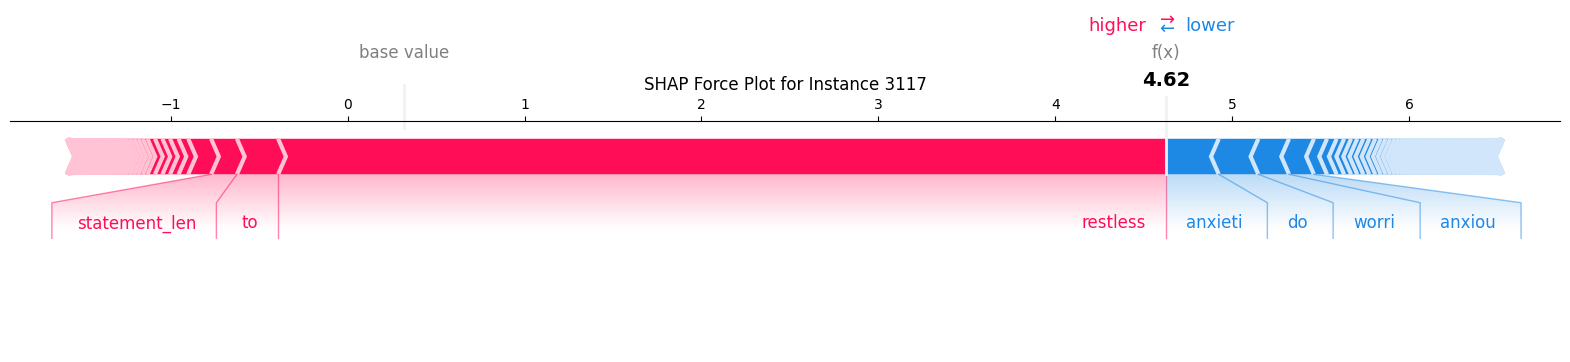


Instance 1411 (True Label: Depression, Prediction: Depression):
Top contributing features:
- depress: 1.5973
- im: 0.3823
- not: 0.2446
- num_of_sentences: -0.1954
- low: 0.1286
- suicid: -0.1249
- am: -0.0956
- what is: 0.0947
- ive: 0.0773
- statement_len: 0.0751


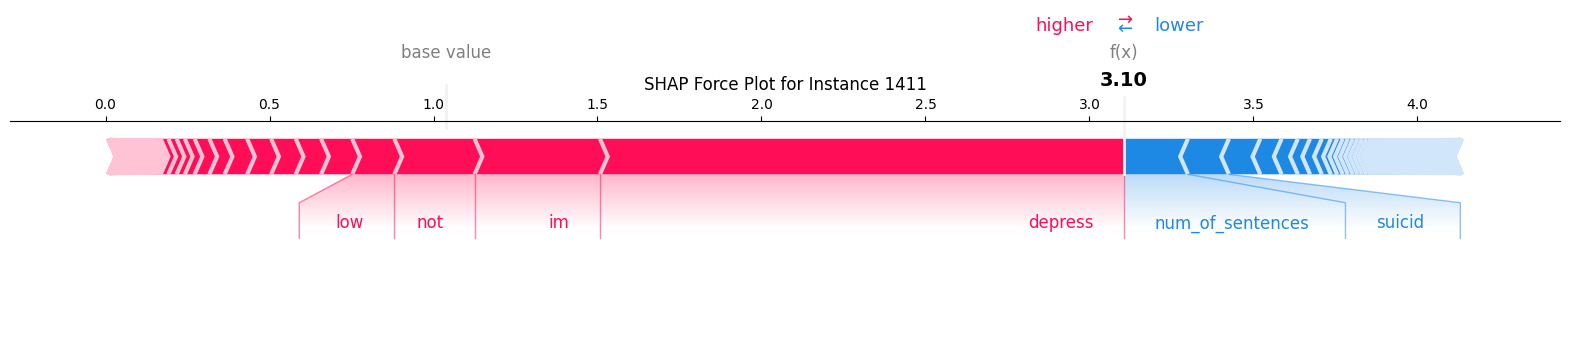


Instance 2621 (True Label: Depression, Prediction: Depression):
Top contributing features:
- depress: -0.3182
- statement_len: -0.3171
- am: 0.2706
- im: 0.2633
- feel: 0.2622
- not: -0.2613
- hate: 0.1565
- num_of_sentences: -0.0923
- thing: 0.0919
- dont: 0.0854


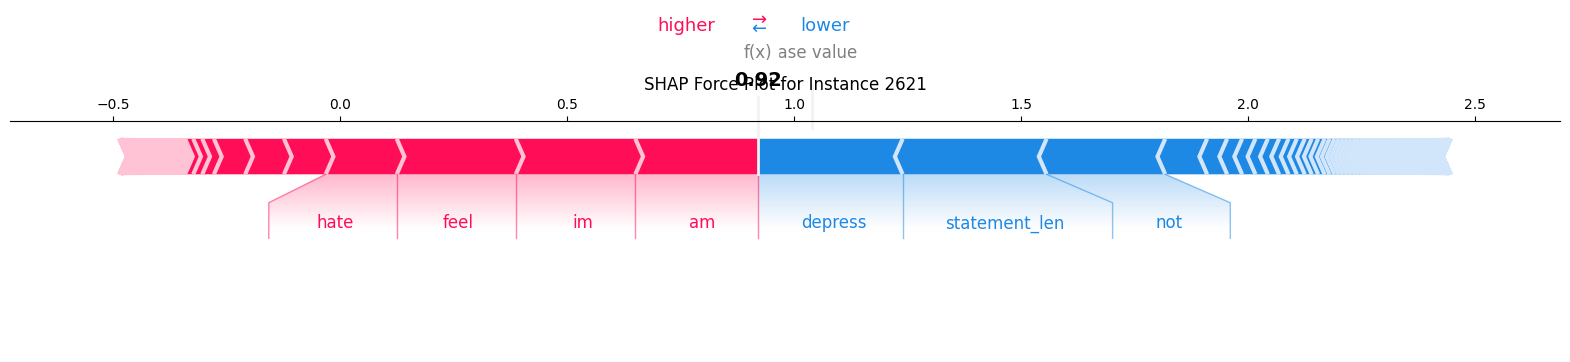

In [72]:
import shap

# Create a SHAP explainer. For tree-based models like XGBoost, TreeExplainer is efficient.
explainer = shap.TreeExplainer(last_model)

# Calculate SHAP values for the selected instances
shap_values = explainer.shap_values(selected_instances)
print(f"Shape of shap_values: {np.array(shap_values).shape}")

# For multi-class classification, shap_values will be a list of arrays, one for each class.
# We need to get the SHAP values for the predicted class for each instance.
predicted_classes = last_model.predict(selected_instances)
print(f"Predicted classes: {predicted_classes}")
num_classes = len(lbl_enc.classes_)
print(f"Number of classes (from lbl_enc): {num_classes}")

instance_shap_values = []
for i in range(selected_instances.shape[0]):
    predicted_class_index = predicted_classes[i]
    print(f"\nInstance {i}: Predicted Class Index = {predicted_class_index}")
    if num_classes == 2: # Binary classification
        instance_shap_values.append(shap_values[i])
    else: # Multi-class classification
        if 0 <= predicted_class_index < num_classes:
            instance_shap_values.append(shap_values[i][:, predicted_class_index]) # Corrected access
        else:
            print(f"Error: Predicted class index {predicted_class_index} is out of bounds (0 to {num_classes - 1}). Skipping instance.")
            continue

# Get feature names (remember to combine TF-IDF and numerical feature names)
tfidf_feature_names = vectorizer.get_feature_names_out()
numerical_feature_names = ['num_of_characters', 'num_of_sentences', 'statement_len']
all_feature_names = list(tfidf_feature_names) + numerical_feature_names

# Explain each prediction
print("\n--- Explanations using SHAP ---")
for i in range(selected_instances.shape[0]):
    print(f"\nInstance {random_indices[i]} (True Label: {lbl_enc.inverse_transform([true_labels[i]])[0]}, Prediction: {lbl_enc.inverse_transform([predictions[i]])[0]}):")
    shap_instance = instance_shap_values[i]
    feature_contributions = sorted(zip(all_feature_names, shap_instance), key=lambda x: abs(x[1]), reverse=True)
    print("Top contributing features:")
    for feature, contribution in feature_contributions[:10]: # Show top 10 contributing features
        print(f"- {feature}: {contribution:.4f}")
    if num_classes > 2:
        expected_value = explainer.expected_value[predicted_classes[i]]
    else:
        expected_value = explainer.expected_value
    shap.force_plot(expected_value, shap_instance, feature_names=all_feature_names, show=False, matplotlib=True)
    plt.title(f"SHAP Force Plot for Instance {random_indices[i]}")
    plt.show()

## Interpretation of SHAP Force Plot for Instance 2131 (Anxiety) For Example 

**True Label:** Anxiety
**Prediction:** Anxiety
**f(x):** 4.15 (Likely a score indicating the strength of the "Anxiety" prediction)

**Feature Contributions:**

The following features were the top contributors to the model's prediction for this specific instance:

**Positive Contributions (Pushing the prediction towards "Anxiety"):**

* **`nervou`: 4.1387** - The strongest positive driver, indicating the word "nervous" significantly increased the likelihood of the "Anxiety" prediction.
* **`to`: 0.2885** - Contributed positively, though to a lesser extent. Its role might be contextual.
* **`im`: 0.2357** - Also contributed positively, potentially within a phrase.
* **`num_of_characters`: 0.1850** - The length of the statement slightly increased the likelihood of the "Anxiety" prediction.
* **`statement_len`: 0.0878** - Similar to `num_of_characters`, a small positive influence.

**Negative Contributions (Counteracting the "Anxiety" prediction):**

* **`anxieti`: -0.2632** - Interestingly, the word "anxiety" itself slightly decreased the prediction score. This suggests the model might have learned a nuanced relationship where in some contexts, "anxiety" might correlate with a slightly lower intensity score compared to other anxiety-related terms.
* **`worri`: -0.2326** - The word "worry" also decreased the prediction score, potentially associated with a different or less intense form of anxiety in the model.
* **`restless`: -0.1474** - Had a small negative impact, suggesting it might slightly lower the score compared to stronger indicators.
* **`num_of_sentences`: -0.1447** - The number of sentences had a minor negative influence.
* **`anxiou`: -0.1325** - Similar to "anxiety," the word "anxious" also slightly decreased the prediction score.

**Summary:**

The model correctly predicted "Anxiety" for this instance, primarily driven by the strong positive contribution of the word "nervous." Other features like "to," "im," and statement length provided minor support. Notably, the explicit terms "anxiety" and "anxious," along with "worry" and "restless," had a slightly negative impact on the prediction score for this specific instance, highlighting potentially complex relationships learned by the model in identifying "Anxiety."

### Determining Bias 

## Quantifying Bias using Recall from a Classification Report (Explanation)

This code analyzes the **recall** metric from a classification report to quantify potential bias in a model's ability to identify different mental health categories. Here's a breakdown of the calculated metrics:

**1. Range of Recall:**

* **Calculation:** The difference between the highest and lowest recall scores observed across all mental health categories.
* **Interpretation:** A **larger range** suggests a greater disparity in the model's ability to correctly identify all instances of different mental health conditions. This indicates that the model is significantly better at recalling some categories than others.

**2. Difference from "Normal" (Baseline) - Recall:**

* **Calculation:** For each mental health category, the recall score is subtracted from the recall score of the "Normal" category (often used as a baseline).
* **Interpretation:**
    * **Larger absolute differences** indicate a greater deviation in recall performance compared to the "Normal" state.
    * A **negative difference** means the model has lower recall for that specific mental health category compared to "Normal" (it misses more actual instances).
    * A **positive difference** (less likely here for mental health categories compared to "Normal") would mean the model has higher recall for that category than for "Normal."

**3. Ratio of Recall to Highest Performing ('Normal'):**

* **Calculation:** The recall score of each mental health category is divided by the highest recall score observed (which is the recall for "Normal" in this case).
* **Interpretation:**
    * Ratios **closer to 1** indicate performance similar to the best-performing category ("Normal").
    * **Lower ratios** indicate poorer recall for that category compared to the best performance, suggesting a potential bias in identifying instances of that specific mental health condition.

**4. Standard Deviation of Recall:**

* **Calculation:** The standard deviation of all the recall scores across the different mental health categories.
* **Interpretation:** A **higher standard deviation** signifies greater variability and inconsistency in the model's recall performance across the different mental health states. This suggests that the model's ability to identify all instances is not uniform across all conditions.

**5. Weighted Average vs. Macro Average (Recall):**

* **Calculation:** The difference between the weighted average recall (which accounts for the number of instances in each category - support) and the macro average recall (which treats each category equally regardless of support).
* **Interpretation:**
    * A **significant positive difference** (weighted average > macro average) suggests that the model achieves better recall on the more frequent (majority) classes. This can indicate a bias where the model is optimized for the conditions with more data and performs worse on less frequent conditions.
    * A **small difference** implies that the class imbalance has less of an impact on the overall recall performance.

**In Summary:**

These calculations provide numerical ways to assess potential bias in your model's ability to correctly identify all instances (recall) of different mental health categories. By analyzing the range, differences from the baseline, ratios, standard deviation, and the comparison of weighted and macro averages for recall, you can gain insights into whether your model's performance is equitable across all mental health conditions or if certain conditions are being under-identified, which can be a critical aspect of bias in this sensitive domain.

In [73]:
# Quantifying Bias 

# Directly provide recall scores for each category from the best model from Week 10 from the test classification report. 
recall_scores_dict = {
    "Anxiety": 0.82,
    "Bipolar": 0.77,
    "Depression": 0.72,
    "Normal": 0.95,
    "Personality disorder": 0.58,
    "Stress": 0.63,
    "Suicidal": 0.67,
}

categories = list(recall_scores_dict.keys())
recall_scores_array = np.array(list(recall_scores_dict.values()))
normal_recall = recall_scores_dict.get("Normal")

if normal_recall is not None:
    # 1. Range of Performance (Recall)
    highest_recall = np.max(recall_scores_array)
    lowest_recall = np.min(recall_scores_array)
    range_recall = highest_recall - lowest_recall
    print(f"Range of Recall: {range_recall:.2f} (Highest: {highest_recall:.2f} for {categories[np.argmax(recall_scores_array)]}, Lowest: {lowest_recall:.2f} for {categories[np.argmin(recall_scores_array)]})")

    # 1. Difference from "Normal" (Baseline) - Recall
    print("\nDifference in Recall from 'Normal' (Baseline):")
    for category, recall in recall_scores_dict.items():
        diff = normal_recall - recall
        print(f"{category}: {diff:.2f}")

    # 1. Ratio of Performance (Recall to Highest)
    print("\nRatio of Recall to Highest Performing ('Normal'):")
    highest_recall_overall = normal_recall
    for category, recall in recall_scores_dict.items():
        ratio = recall / highest_recall_overall
        print(f"{category}: {ratio:.2f}")

    # 1. Standard Deviation of Performance (Recall)
    std_recall = np.std(recall_scores_array)
    print(f"\nStandard Deviation of Recall: {std_recall:.2f}")

    # You would need to manually provide macro and weighted average recall if you're not parsing the full report.
    macro_avg_recall = 0.73  # Replace with the actual macro avg recall
    weighted_avg_recall = 0.79  # Replace with the actual weighted avg recall
    difference_macro_weighted_recall = weighted_avg_recall - macro_avg_recall
    print(f"\nDifference between Weighted and Macro Avg Recall: {difference_macro_weighted_recall:.2f}")
else:
    print("Error: 'Normal' category recall not found in the provided data.")

Range of Recall: 0.37 (Highest: 0.95 for Normal, Lowest: 0.58 for Personality disorder)

Difference in Recall from 'Normal' (Baseline):
Anxiety: 0.13
Bipolar: 0.18
Depression: 0.23
Normal: 0.00
Personality disorder: 0.37
Stress: 0.32
Suicidal: 0.28

Ratio of Recall to Highest Performing ('Normal'):
Anxiety: 0.86
Bipolar: 0.81
Depression: 0.76
Normal: 1.00
Personality disorder: 0.61
Stress: 0.66
Suicidal: 0.71

Standard Deviation of Recall: 0.12

Difference between Weighted and Macro Avg Recall: 0.06


## Interpretation of Bias Based on Recall Metrics

Based on the provided recall metrics, there is evidence of **significant bias** in the model's ability to correctly identify different mental health categories:

**Key Observations Highlighting Potential Bias:**

* **Significant Range of Recall (0.37):** The recall score varies considerably across categories, from a high of 0.95 for "Normal" to a low of 0.58 for "Personality disorder." This wide range indicates the model is much better at identifying some conditions than others, suggesting a bias in its detection capabilities.

* **Large Differences in Recall from "Normal" (Baseline):** Compared to the "Normal" category (recall = 0.95), several mental health conditions show substantial deficits in recall:
    * **Personality disorder: -0.37**
    * **Stress: -0.32**
    * **Suicidal: -0.28**
    * **Depression: -0.23**
    * **Bipolar: -0.18**
    * **Anxiety: -0.13**
    This indicates the model misses a significant proportion of actual cases for these conditions compared to the "Normal" state. The large negative differences for "Personality disorder," "Stress," and "Suicidal" are particularly concerning due to the potential severity of false negatives.

* **Low Ratios of Recall to "Normal":** The recall performance relative to the best-performing category ("Normal") is low for several conditions:
    * **Personality disorder: 0.61** (Recall is only 61% of "Normal")
    * **Stress: 0.66**
    * **Suicidal: 0.71**
    * **Depression: 0.76**
    * **Bipolar: 0.81**
    * **Anxiety: 0.86**
    These ratios highlight that the model is considerably less effective at recalling instances of these mental health conditions compared to "Normal."

* **Non-Negligible Standard Deviation (0.12):** The standard deviation of 0.12 in recall scores across categories indicates a considerable spread in the model's performance. This lack of consistency suggests bias, as the model's ability to correctly identify instances varies significantly depending on the mental health category.

* **Positive Difference Between Weighted and Macro Average Recall (0.06):** The weighted average recall is higher than the macro average recall. This suggests that the model performs better on the more frequent categories in the dataset (likely "Normal" and "Depression" based on typical class distributions in such tasks). This indicates a potential bias towards the majority classes, where the model might be better at recalling them simply due to having more training examples.

**Conclusion on Bias:**

The provided recall metrics clearly demonstrate **significant bias** in the model's ability to identify different mental health categories. The model exhibits:

* **Substantial under-detection (low recall) for "Personality disorder," "Stress," and "Suicidal"**, which can have serious real-world consequences.
* **Potential bias against less frequent categories**, as indicated by the lower recall and the difference between weighted and macro average recall.
* **Over-performance on the "Normal" category**, potentially due to its higher representation in the data.

Addressing this bias is crucial for ensuring the model is fair, reliable, and effective in a real-world application where accurate identification of all mental health states is important. Further investigation into the reasons for these disparities and the implementation of bias mitigation techniques are necessary.

## Addressing Potential Bias (Note on Mitigation)

The observed bias in recall performance across different mental health categories, particularly the under-detection of "Personality disorder," "Stress," and "Suicidal," could potentially be addressed through techniques aimed at balancing the class distribution in the training data.

**Note on SMOTE:**

One such technique is SMOTE (Synthetic Minority Over-sampling Technique). SMOTE works by creating synthetic instances of the minority classes, effectively increasing their representation in the training data. This can help the model learn to better identify instances of these less frequent categories, potentially improving their recall.

**Computational Limitations:**

However, as noted, applying SMOTE to the entire dataset in the current JupyterLab environment proved to be computationally intensive and led to crashes. This suggests that the available resources (likely CPU and RAM) are insufficient for handling the increased data size and complexity that SMOTE introduces, especially with a potentially large original dataset.

**Potential with GPU Access:**

Given access to GPUs (Graphics Processing Units) within this environment, the computational limitations associated with SMOTE and similar oversampling techniques could likely be overcome. GPUs are highly parallel processors that can significantly accelerate the computations involved in training machine learning models on larger and more balanced datasets. With GPU acceleration, it would be feasible to:

* **Apply SMOTE effectively:** Generate synthetic samples for the minority mental health categories without crashing the environment.
* **Retrain the model:** Train a new model on the more balanced dataset, allowing it to learn more robust representations for all categories and potentially reduce the observed bias in recall.

**Conclusion on Mitigation:**

While SMOTE presents a viable strategy for addressing the identified bias, its practical application in the current environment is limited by computational constraints. With access to GPUs, the computational intensity of oversampling techniques like SMOTE could be managed, paving the way for a more balanced and potentially less biased model in predicting different mental health categories.

### Week 12 Code Saving and Packaging Model for Deployment

Now we will save our model as a pickle file so we can deploy it. 

In [83]:
# Create the 'models' folder if it doesn't exist
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# save pickle file
model_filename = f"{last_model_name.replace(' ', '_').lower()}_xgboost_model.pkl"
model_filepath = os.path.join(models_dir, model_filename) #changed model_filename to model_filepath
with open(model_filepath, 'wb') as file:
    pickle.dump(last_model, file)
print(f"Model saved to {model_filepath}") #changed model_filename to model_filepath

Model saved to models/xgb_fastest_xgboost_model.pkl


In [84]:
# --- How to load the saved pickle file ---
# To load the saved model later:
with open(model_filepath, 'rb') as file: #changed model_filename to model_filepath
    loaded_model = pickle.load(file)

print(f"Model '{model_filename}' loaded successfully!")

Model 'xgb_fastest_xgboost_model.pkl' loaded successfully!


### Saving the Training, Validation, and Test Data as pickle files

In [76]:
# Save X_train_resampled1
with open('X_train_resampled1.pkl', 'wb') as f:
    pickle.dump(X_train_resampled1, f)
print("Saved X_train_resampled1 as X_train_resampled1.pkl")

# Save y_train_resampled1
with open('y_train_resampled1.pkl', 'wb') as f:
    pickle.dump(y_train_resampled1, f)
print("Saved y_train_resampled1 as y_train_resampled1.pkl")

# Save X_val1
with open('val_x1.pkl', 'wb') as f:
    pickle.dump(val_x1, f)
print("Saved X_val1 as X_val1.pkl")

# Save val_y1
with open('val_y1.pkl', 'wb') as f:
    pickle.dump(val_y1, f)
print("Saved val_y1 as val_y1.pkl")

Saved X_train_resampled1 as X_train_resampled1.pkl
Saved y_train_resampled1 as y_train_resampled1.pkl
Saved X_val1 as X_val1.pkl
Saved val_y1 as val_y1.pkl


In [85]:
# Save X_train_resampled1
X_train_resampled1_path = os.path.join(models_dir, 'X_train_resampled1.pkl')
with open(X_train_resampled1_path, 'wb') as f:
    pickle.dump(X_train_resampled1, f)
print(f"Saved X_train_resampled1 as {X_train_resampled1_path}")

# Save y_train_resampled1
y_train_resampled1_path = os.path.join(models_dir, 'y_train_resampled1.pkl')
with open(y_train_resampled1_path, 'wb') as f:
    pickle.dump(y_train_resampled1, f)
print(f"Saved y_train_resampled1 as {y_train_resampled1_path}")

# Save X_val1
X_val1_path = os.path.join(models_dir, 'val_x1.pkl')
with open(X_val1_path, 'wb') as f:
    pickle.dump(val_x1, f)
print(f"Saved X_val1 as {X_val1_path}")

# Save val_y1
val_y1_path = os.path.join(models_dir, 'val_y1.pkl')
with open(val_y1_path, 'wb') as f:
    pickle.dump(val_y1, f)
print(f"Saved val_y1 as {val_y1_path}")

Saved X_train_resampled1 as models/X_train_resampled1.pkl
Saved y_train_resampled1 as models/y_train_resampled1.pkl
Saved X_val1 as models/val_x1.pkl
Saved val_y1 as models/val_y1.pkl


In [87]:
# ✅ Save test_x_combined1
test_x_combined1_path = os.path.join(models_dir, 'test_x_combined1.pkl')
with open(test_x_combined1_path, 'wb') as f:
    pickle.dump(test_x_combined1, f)
print(f"Saved test_x_combined1 as {test_x_combined1_path}")

# ✅ Save test_y1
test_y1_path = os.path.join(models_dir, 'test_y1.pkl')
with open(test_y1_path, 'wb') as f:
    pickle.dump(test_y1, f)
print(f"Saved test_y1 as {test_y1_path}")

# ✅ Save test predictions (optional but useful)
y_test_pred_path = os.path.join(models_dir, 'y_test_pred.pkl')
with open(y_test_pred_path, 'wb') as f:
    pickle.dump(y_test_pred, f)
print(f"Saved y_test_pred as {y_test_pred_path}")


Saved test_x_combined1 as models/test_x_combined1.pkl
Saved test_y1 as models/test_y1.pkl
Saved y_test_pred as models/y_test_pred.pkl


### Loading the data from the pickle files

In [89]:
# --- Loading the Data ---
# Load X_train_resampled1
X_train_resampled1_path = os.path.join(models_dir, 'X_train_resampled1.pkl') #added path
with open(X_train_resampled1_path, 'rb') as f:
    loaded_X_train_resampled1 = pickle.load(f)
print("Loaded X_train_resampled1")

# Load y_train_resampled1
y_train_resampled1_path = os.path.join(models_dir, 'y_train_resampled1.pkl') #added path
with open(y_train_resampled1_path, 'rb') as f:
    loaded_y_train_resampled1 = pickle.load(f)
print("Loaded y_train_resampled1")

# Load X_val1
X_val1_path = os.path.join(models_dir, 'val_x1.pkl') #added path
with open(X_val1_path, 'rb') as f:
    loaded_X_val1 = pickle.load(f)
print("Loaded X_val1")

# Load val_y1
val_y1_path = os.path.join(models_dir, 'val_y1.pkl') #added path
with open(val_y1_path, 'rb') as f:
    loaded_val_y1 = pickle.load(f)
print("Loaded val_y1")

# Load test_x_combined1
test_x_combined1_path = os.path.join(models_dir, 'test_x_combined1.pkl') #added path
with open(test_x_combined1_path, 'rb') as f:
    loaded_test_x_combined1 = pickle.load(f)
print("Loaded test_x_combined1")

# Load test_y1
test_y1_path = os.path.join(models_dir, 'test_y1.pkl') #added path
with open(test_y1_path, 'rb') as f:
    loaded_test_y1 = pickle.load(f)
print("Loaded test_y1")

# Load test predictions (optional but useful)
y_test_pred_path = os.path.join(models_dir, 'y_test_pred.pkl') #added path
with open(y_test_pred_path, 'rb') as f:
    loaded_y_test_pred = pickle.load(f)
print("Loaded y_test_pred")

# Now you can work with the loaded data variables
print("\nShape of loaded X_train_resampled1:", loaded_X_train_resampled1.shape)
print("Shape of loaded y_train_resampled1:", loaded_y_train_resampled1.shape)
print("Shape of loaded X_val1:", loaded_X_val1.shape)
print("Shape of loaded val_y1:", loaded_val_y1.shape)
print("Shape of loaded test_x_combined1:", loaded_test_x_combined1.shape)
print("Shape of loaded test_y1:", loaded_test_y1.shape)
print("Shape of loaded y_test_pred:", loaded_y_test_pred.shape)

Loaded X_train_resampled1
Loaded y_train_resampled1
Loaded X_val1
Loaded val_y1
Loaded test_x_combined1
Loaded test_y1
Loaded y_test_pred

Shape of loaded X_train_resampled1: (51889, 50003)
Shape of loaded y_train_resampled1: (51889,)
Shape of loaded X_val1: (4773, 4)
Shape of loaded val_y1: (4773,)
Shape of loaded test_x_combined1: (4774, 50003)
Shape of loaded test_y1: (4774,)
Shape of loaded y_test_pred: (4774,)


### Libraries/Dependencies Imported in the Code:

1.  **numpy (imported as np)**
    * **Description:** Fundamental library for numerical computing in Python, providing support for arrays, matrices, and a wide range of mathematical functions.

2.  **pandas (imported as pd)**
    * **Description:** Library for data manipulation and analysis, providing powerful data structures like DataFrames for handling structured data.

3.  **matplotlib.pyplot (imported as plt)**
    * **Description:** Plotting library for creating static, animated, and interactive visualizations in Python.

4.  **wordcloud (imported as WordCloud)**
    * **Description:** Generates word clouds from text data, useful for visualizing the most frequent words in a corpus.

5.  **warnings**
    * **Description:** Provides a way to issue warnings during program execution, typically for deprecated features or potential issues.

6.  **os**
    * **Description:** Provides functions to interact with the operating system, such as file handling, environment variables, and directory operations.

7.  **seaborn (imported as sns)**
    * **Description:** Statistical data visualization library built on top of matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

8.  **re**
    * **Description:** Provides support for regular expressions, allowing for pattern matching in strings.

9.  **random**
    * **Description:** Implements pseudo-random number generators for generating random values, selecting random items, and shuffling sequences.

10. **imblearn.over_sampling.RandomOverSampler**
    * **Description:** A technique from the imbalanced-learn library that performs random over-sampling to balance class distribution in imbalanced datasets.

11. **scipy.sparse.hstack and scipy.sparse.csr_matrix**
    * **Description:** Functions from the scipy library to handle sparse matrices and efficiently perform matrix operations with low memory usage.

12. **nltk (Natural Language Toolkit)**
    * **Description:** A toolkit for working with human language data, providing easy access to tools for tokenization, stemming, tagging, parsing, and other NLP tasks.

13. **nltk.tokenize.word_tokenize**
    * **Description:** Tokenizes a string of text into individual words.

14. **nltk.stem.PorterStemmer**
    * **Description:** A stemmer from NLTK that reduces words to their root form by removing suffixes (e.g., "running" becomes "run").

15. **sklearn.feature_extraction.text.TfidfVectorizer**
    * **Description:** Converts a collection of text documents into a matrix of TF-IDF features, useful for text analysis and machine learning.

16. **sklearn.model_selection.GridSearchCV**
    * **Description:** Performs an exhaustive search over a specified parameter grid, using cross-validation to find the best model hyperparameters.

17. **sklearn.preprocessing.LabelEncoder**
    * **Description:** Encodes categorical labels as numeric values, typically used for target variables in classification problems.

18. **sklearn.model_selection.train_test_split**
    * **Description:** Splits data into training and test sets in a way that ensures both sets are representative of the entire dataset.

19. **sklearn.linear_model.LogisticRegression**
    * **Description:** A machine learning model used for binary or multiclass classification based on a logistic function.

20. **sklearn.metrics.accuracy_score, sklearn.metrics.classification_report, and sklearn.metrics.confusion_matrix**
    * **Description:** Functions to evaluate model performance. Accuracy score measures prediction accuracy, while the classification report provides precision, recall, and F1 scores. The confusion matrix visualizes classification errors.

21. **sklearn.naive_bayes.BernoulliNB**
    * **Description:** A variant of the Naive Bayes classifier that is used for binary/boolean feature data.

22. **gc (Garbage Collection module)**
    * **Description:** Provides functions for managing the memory by freeing unused objects, which helps in optimizing performance in memory-intensive operations.

23. **xgboost.XGBClassifier**
    * **Description:** A popular implementation of gradient boosting for classification problems, known for its speed and performance in structured/tabular data.

24. **shap**
    * **Description:** A library for model interpretability and explainability, providing tools for explaining predictions made by machine learning models (e.g., through SHAP values).

In [80]:
import os
# Find operating system os
os_name = os.name
print(f"Operating System Name (os.name): {os_name}")

Operating System Name (os.name): posix


In [81]:
# Python Version
import sys
python_version = sys.version
print(f"Python Version (sys.version): {python_version}")

Python Version (sys.version): 3.12.6 | packaged by conda-forge | (main, Sep 22 2024, 14:16:49) [GCC 13.3.0]


In [82]:
# list of the packages, their versions and dependencies in our code 
!pip freeze

absl-py==2.1.0
alembic==1.14.0
annotated-types==0.7.0
anyio==4.8.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1708969572489/work
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
astunparse==1.6.3
async-lru==2.0.4
attrs==24.3.0
Automat==24.8.1
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1711936407380/work
brewer2mpl==1.4.1
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1725267488082/work
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1725278078093/work/certifi
certipy==0.2.1
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1725560558132/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1698833585322/work
click==8.1.8
cloudpickle==3.1.1
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
comm==0.2.2
conda @ file:///home